In [1]:
options(warn=-1)
library(ggplot2)
library(gridExtra)
library(reshape2)
library(RColorBrewer)
suppressMessages(library(plyr))
suppressMessages(library(dplyr))
library(stringr)
suppressMessages(library(tidyr))
theme_set(theme_bw())
library(parallel)
library(scales)
library(knitr)
library(IRdisplay)
suppressMessages(library(Biostrings))
options(repr.plot.width=7, repr.plot.height=4)
format_markdown = function(str) str %>% kable %>% paste(collapse = '\n') %>% display_markdown

isotypes = c('Ala', 'Arg', 'Asn', 'Asp', 'Cys', 'Gln', 'Glu', 'Gly', 'His', 'Ile', 'iMet', 'Leu', 'Lys', 'Met', 'Phe', 'Pro', 'Ser', 'Thr', 'Trp', 'Tyr', 'Val')
display_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8'='8', 'X9'='9', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26','X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')

# includes all paired including 3d
#paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8.14'='*8:14', 'X9.23'='*9:23', 'X10.25'='10:25', 'X10.45'='*10:45', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X15.48'='*15:48','X18.55'='*18:55', 'X19.56'='*19:56', 'X22.46'='*22:46', 'X26.44'='*26:44', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54.58'='*54:58')
paired_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61')
paired_identities = c('GC', 'AU', 'UA', 'CG', 'GU', 'UG', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble', 'Paired', 'Bulge', 'Mismatched', 'Absent')

single_positions = c('X8'='8', 'X9'='9', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
single_identities = c('A', 'C', 'G', 'U', 'Purine', 'Pyrimidine', 'Weak', 'Strong', 'Amino', 'Keto', 'B', 'D', 'H', 'V', 'N', 'Absent')

colors = c('A '='gray20', 'C '='gray20', 'G '='gray20', 'U '='gray20', 'Absent '='gray20', 'Purine '='gray20', 'Pyrimidine '='gray20', 'Weak'='gray20', 'Strong'='gray20', 'Amino'='gray20', 'Keto'='gray20', 'B'='gray50', 'D'='gray50', 'H'='gray50', 'V'='gray50', 'N' = 'gray20', 'GC'='gray20', 'AU'='gray20', 'UA'='gray20', 'CG'='gray20', 'GU'='gray20', 'UG'='gray20', 'PurinePyrimidine'='gray20', 'PyrimidinePurine'='gray20', 'StrongPair'='gray20', 'WeakPair'='gray20', 'AminoKeto'='gray20', 'KetoAmino'='gray20', 'Wobble'='gray20', 'Paired '='gray20', 'Bulge '='gray20', 'Mismatched '='gray20', 'High mismatch rate' = 'gray20')
fills = c('A '='#ffd92f', 'C '='#4daf4a', 'G '='#e41a1c', 'U '='#377eb8', 'Purine '='#ff8300', 'Pyrimidine '='#66c2a5', 'Weak'='#b3de69', 'Strong'='#fb72b2', 'Amino'='#c1764a', 'Keto'='#b26cbd', 'B '='#e5c494', 'D'='#ccebd5', 'H'='#ffa79d', 'V'='#a6cdea', 'N' = 'white', 'Absent '='gray50', 'Mismatched '='gray20', 'Paired '='#ffffcc', 'High mismatch rate' = 'gray70')

# simple codes for reviewer #3
simple_identities = c('A' = 'A ', 'C' = 'C ', 'G' = 'G ', 'U' = 'U ', 'Purine' = 'Purine ', 'Pyrimidine' = 'Pyrimidine ', 
                      'Weak' = 'A/U (W) ', 'Strong' = 'G/C (S) ', 'Amino' = 'A/C (M) ', 'Keto' = 'G/U (K) ', 
                      'B' = 'C/G/U (B) ', 'D' = 'A/G/U (D) ', 'H' = 'A/C/U (H) ', 'V' = 'A/C/G (V) ', 'N' = 'N ', 'Absent' = 'Absent ', 'Paired' = 'Paired ', 'Mismatched' = 'Mismatched ', 'X' = 'High mismatch rate       ')
colors = c(colors, 'A/U (W) ' = 'gray20', 'G/C (S) ' = 'gray20', 'A/C (M) ' ='gray20', 'G/U (K) ' = 'gray20', 'C/G/U (B) ' = 'gray50', 'A/G/U (D) ' = 'gray50', 'A/C/U (H) ' = 'gray50', 'A/C/G (V) ' = 'gray50', 'N ' = 'gray20', 'High mismatch rate       ' = 'gray20')
fills = c(fills, 'A/U (W) ' = '#b3de69', 'G/C (S) ' = '#fb72b2', 'A/C (M) ' ='#c1764a', 'G/U (K) ' = '#b26cbd', 'C/G/U (B) ' = '#e5c494', 'A/G/U (D) ' = '#ccebd5', 'A/C/U (H) ' = '#ffa79d', 'A/C/G (V) ' = '#a6cdea', 'N ' = 'white', 'High mismatch rate       ' = 'gray90')

In [2]:
identities = read.delim('identities-100918.tsv', sep='\t', stringsAsFactors = FALSE) %>%
  filter(isotype %in% isotypes) %>%
  mutate(confidence = as.logical(confidence),
         restrict = as.logical(restrict),
         duplicate = as.logical(duplicate),
         adjusted = as.logical(adjusted),
         abbrev = str_extract(species_long, '^\\w+ \\w+')) %>%
  mutate(abbrev = ifelse(str_detect(species_long, "sp\\."), paste0(str_extract(species_long, '^\\w+'), ' sp.'), abbrev))

In [3]:
load('best-freqs.RData')
load('clade-isotype-specific.RData')
load('isotype-specific.RData')
load('consensus-IDEs.RData')
load('clade-isotype-freqs.RData')

# Universal and near-universal sequence features

In [4]:
clade_iso_freqs %>%
  group_by(positions, feature) %>%
  summarize(freq = sum(n) / sum(clade_iso_pos_total)) %>% 
  filter((positions == 'X8.14' & feature == 'UA') | 
         (positions == 'X14' & feature == 'A') | 
         (positions == 'X9' & feature == 'Purine') | 
         (positions == 'X11.24' & feature == 'PyrimidinePurine') | 
         (positions == 'X15.48' & feature == 'PurinePyrimidine') | 
         (positions == 'X16' & feature == 'Pyrimidine') |  
         (positions == 'X18.55' & feature == 'GU') |  
         (positions == 'X55' & feature == 'U') | 
         (positions == 'X19.56' & feature == 'GC') | 
         (positions == 'X21' & feature == 'A') | 
         (positions == 'X32' & feature == 'Pyrimidine') | 
         (positions == 'X33' & feature == 'Pyrimidine') | 
         (positions == 'X33' & feature == 'U') | 
         (positions == 'X37' & feature == 'Purine') | 
         (positions == 'X46' & feature == 'Purine') | 
         (positions == 'X48' & feature == 'Pyrimidine') | 
         (positions == 'X52.62' & feature == 'PurinePyrimidine') | 
         (positions == 'X53.61' & feature == 'GC') | 
         (positions == 'X54.58' & feature == 'UA') | 
         (positions == 'X57' & feature == 'Purine') | 
         (positions == 'X60' & feature == 'Pyrimidine')) %>%
  mutate(freq = paste0(round(freq * 100, digits = 1), '%'))

,positions,feature,freq
1,X11.24,PyrimidinePurine,97.1%
2,X14,A,99.7%
3,X15.48,PurinePyrimidine,93%
4,X16,Pyrimidine,89.9%
5,X18.55,GU,98.7%
6,X19.56,GC,97.2%
7,X21,A,98.9%
8,X32,Pyrimidine,98.8%
9,X33,Pyrimidine,99.4%
10,X33,U,98.4%


# No. genomes and tRNAs

In [5]:
identities %>% mutate(clade = as.character(clade)) %>%
  count(clade, species, abbrev, restrict) %>% spread(restrict, n, 0) %>%
  group_by(clade) %>% summarize(Genomes = length(unique(abbrev)), tRNAs = sum(c(`FALSE`, `TRUE`)), Analyzed = sum(`FALSE`)) %>%
  rbind(c("Total", sum(.$Genomes), sum(.$tRNAs), sum(.$Analyzed))) %>%
  kable %>% paste(collapse = '\n') %>% display_markdown

|clade      |Genomes |tRNAs  |Analyzed |
|:----------|:-------|:------|:--------|
|Fungi      |53      |12753  |4804     |
|Insect     |18      |4803   |1664     |
|Mammal     |45      |56383  |11627    |
|Nematode   |13      |6113   |1601     |
|Plant      |20      |12771  |4282     |
|Vertebrate |16      |10328  |3984     |
|Total      |165     |103151 |27962    |

# Sequence features

## Isotype-specific sequence features

In [6]:
get_5prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V","N"="N",
                                            "GC"="G", "AU"="A", "UA"="U", "CG"="C", "GU"="G", "UG"="U", "Absent"="Absent", "PurinePyrimidine"="Purine", "PyrimidinePurine"="Pyrimidine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Amino", "KetoAmino"="Keto", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched", "X"="X")[identity])
get_3prime = Vectorize(function(identity) c("A"="A", "G"="G", "C"="C", "U"="U", "Purine"="Purine", "Pyrimidine"="Pyrimidine", "Amino"="Amino", "Keto"="Keto", "Weak"="Weak", "Strong"="Strong", "B"="B", "H"="H", "D"="D", "V"="V","N"="N",
                                            "GC"="C", "AU"="U", "UA"="A", "CG"="G", "GU"="U", "UG"="G", "Absent"="Absent", "PurinePyrimidine"="Pyrimidine", "PyrimidinePurine"="Purine", "StrongPair"="Strong", "WeakPair"="Weak", "AminoKeto"="Keto", "KetoAmino"="Amino", "Paired"="Paired", "Bulge"="Bulge", "Mismatched"="Mismatched", "X"="X")[identity])

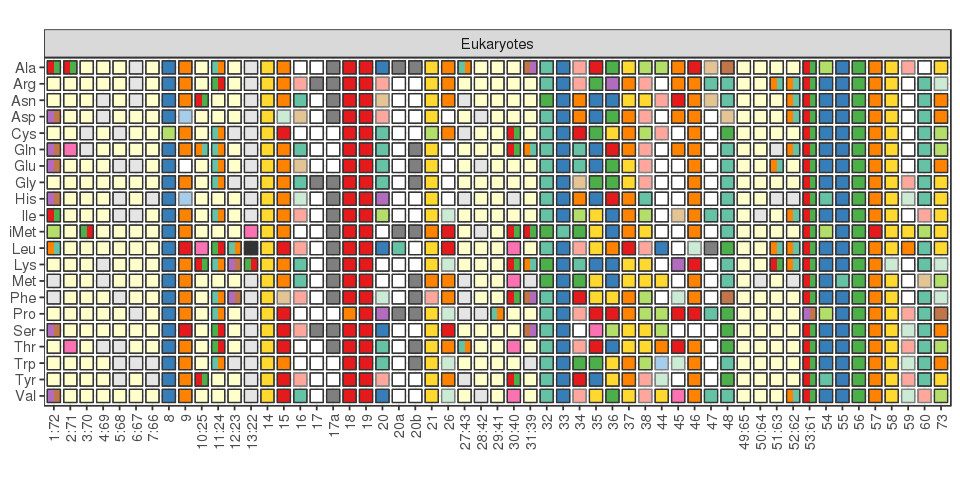

In [7]:
selected_positions = c('X2.71', 'X3.70', 'X4.69', 'X5.68', 'X6.67', 'X12.23', 'X20a', 'X26', 'X27.43', 'X28.42', 'X29.41', 'X30.40', 'X45', 'X50.64', 'X52.62')
iso_plot = isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>% 
  mutate(positions=factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype=factor(isotype, levels=rev(isotypes))) %>% 
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), identity = 'N')) %>%
  group_by(isotype, positions) %>%
  summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>% 
  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>%
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>%
  mutate(facet = "Eukaryotes") %>%
  ggplot() + 
    geom_rect(aes(xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, fill=half_identity)) + 
    geom_tile(aes(x=positions, y=isotype, color=identity), alpha = 0, width=0.8, height=0.8, size=0.35) +
    facet_wrap(~ facet) +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x=element_text(angle=90, hjust=1, vjust=0.5),
          axis.title=element_blank(),
          legend.position='none') + 
    coord_equal()
  
options(repr.plot.width=8, repr.plot.height=4)
iso_plot
ggsave(iso_plot, filename = "fig2a-isotype-features.pdf", width = 8, height = 4)

## Clade-specific sequence features

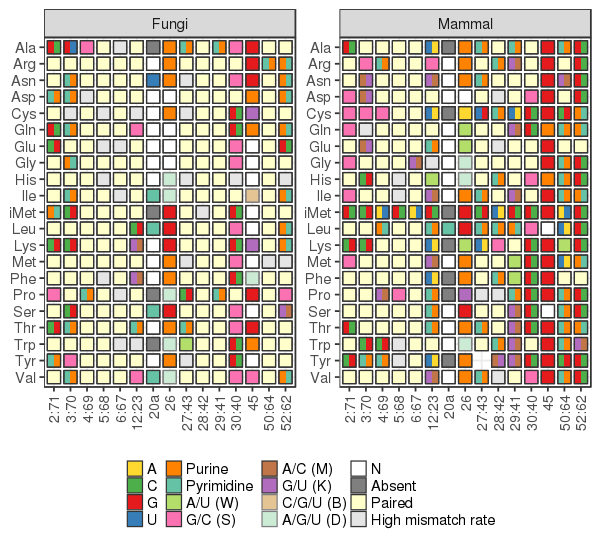

In [8]:
clade_plot = clade_isotype_specific %>% 
  ungroup %>%
  filter(positions %in% names(display_positions)) %>% 
  filter(clade %in% c("Mammal", "Fungi")) %>%
  mutate(positions = factor(positions, names(display_positions)), 
         isotype = factor(isotype, levels = rev(isotypes))) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), clade = c('Fungi', 'Mammal'), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), clade = c('Fungi', 'Mammal'), identity = 'N')) %>%
  group_by(isotype, clade, positions) %>%
  summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>% 
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(positions = factor(positions, levels = selected_positions)) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  filter(!is.na(positions)) %>%
  mutate(half_identity=factor(half_identity), identity=factor(half_identity)) %>%
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.8, height = 0.8, size = 0.35) + 
    facet_wrap(~ clade, scales = "free", ncol = 2) +
    scale_x_discrete(labels = display_positions[selected_positions], drop = TRUE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          legend.key.width = unit(0.7, "lines"),
          legend.key.height = unit(0.7, "lines"),
          axis.title=element_blank(),
          legend.position = "bottom") +
    guides(fill = guide_legend(title = NULL, nrow = 4), color = guide_legend(title = NULL, nrow = 4), alpha = FALSE) +
    coord_equal()

options(repr.plot.width=5, repr.plot.height=4.55)
clade_plot

## Cross-clade difference heatmap

Strategy: (1) generate isotype-clade-specific covariance model, (2) align all tRNAs of the other clade to the model, (4) parse position-specific bit scores, (5) average scores by position and isotype, (6) plot!

In [9]:
compare_clade_bits = function(clade1, clade2) {
  
  bits = data.frame()  
  euk_seqs = readDNAStringSet(filepath = '/projects/lowelab/users/blin/identity/euk-isotypes/euk-tRNAs.fa', format = 'fasta')
  names(euk_seqs) = str_replace(str_extract(names(euk_seqs), '\\S+'), '\\|', '_')

  # Get bit scores for each position in each isotype
  for (current_isotype in isotypes) {
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == clade1)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(clade1, '-', current_isotype, '.fa'))
  
    # create covariance model from clade 1
    system(paste0('cmalign -g --notrunc --matchonly -o ', clade1, '-', current_isotype, '.sto /projects/lowelab/users/blin/tRNAscan/models/domain-specific/euk-num-092016.cm ', clade1, '-', current_isotype,'.fa > /dev/null'))
    system(paste0('cmbuild --hand --enone -F ', clade1, '-', current_isotype, '.cm ', clade1, '-', current_isotype, '.sto > /dev/null'))

    # align clade 2 tRNAs to clade 1 cm
    subset = identities %>% filter(!restrict, isotype == current_isotype, clade == clade2)
    writeXStringSet(euk_seqs[match(subset$seqname, names(euk_seqs))], filepath = paste0(clade2, '-', current_isotype, '.fa'))
    system(paste0('cmalign -g --notrunc --matchonly --tfile ', clade1, '-', clade2, '-', current_isotype, '.tfile ', clade1, '-', current_isotype, '.cm ', clade2, '-', current_isotype, '.fa > /dev/null'))
    system(paste0('python parse-parsetree.py ', clade1, '-', clade2, '-', current_isotype, '.tfile > ', clade1, '-', clade2, '-', current_isotype, '.bits'))
    
    # Add to data frame
    df = read.table(paste0(clade1, '-', clade2, '-', current_isotype, '.bits'), comment.char = '', header = FALSE) %>% 
      mutate(Isotype = current_isotype, Clade = clade2)
    bits = rbind(bits, df)

    # clean up
    system(paste0('rm ', clade1, '-', clade2, '-', current_isotype, '.tfile ', clade1, '-', clade2, '-', current_isotype, '.bits'))
    system(paste0('rm ', clade1, '-', current_isotype, '.fa ', clade1, '-', current_isotype, '.sto ', clade1, '-', current_isotype, '.cm ', clade2, '-', current_isotype, '.fa'))
  }
  
  bits %>% mutate(Position = factor(V2, c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '8', '9', '10:25', '11:24', '12:23', '13:22', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '26', '27:43', '28:42', '29:41', '30:40', '31:39', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '49:65', '50:64', '51:63', '52:62', '53:61', '54', '55', '56', '57', '58', '59', '60', '73')),
                       Bits = V3,
                       Identity = V4) %>%
    select(-V1, -V2, -V3, -V4) %>%
    filter(!is.na(Position)) %>%
    group_by(Position, Isotype, Clade) %>%
    summarize(Bits = mean(Bits)) %>%
    ungroup
}

In [10]:
bits = compare_clade_bits("Mammal", "Fungi")

In [11]:
compare_plot = bits %>%
  filter(Position %in% display_positions[selected_positions]) %>%
  mutate(Position = factor(Position, levels = display_positions[selected_positions])) %>%
  mutate(facet = "Mammal vs Fungi") %>%
  ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'gray20', width = 0.8, height = 0.8, size = 0.35) +
    facet_wrap(~ facet) +
    scale_x_discrete(labels = display_positions[selected_positions], drop = TRUE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c("mediumpurple4", "firebrick", "white", "steelblue"),
                         values = c(0, 0.5, 0.75, 1),
                         limits = c(-15, 5)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.title.y = element_blank(),
          plot.margin = unit(c(5.5, 5.5, 14, 5.5), "points"),
          legend.key.height = unit(0.5, "lines"),
          legend.position = "bottom") +
    guides(fill = guide_colorbar(title = "Score", barwidth = 7)) + 
    xlab('Position') + ylab('Isotype') + coord_equal()

# options(repr.plot.width=2.5, repr.plot.height=4.55)
# compare_plot
# ggsave(compare_plot, filename = "fig2c-mammal-vs-fungi.pdf", width = 2.5, height = 4.55)

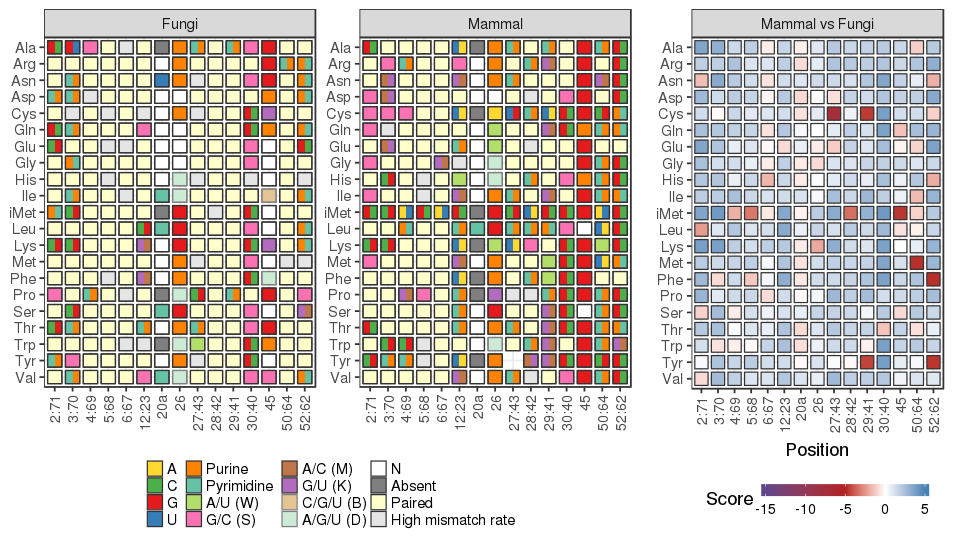

In [12]:
options(repr.plot.width=8, repr.plot.height=4.55)
plot = grid.arrange(clade_plot, compare_plot, layout_matrix = rbind(c(2, 2, 3)))
ggsave(plot, filename = 'fig2b-mammal-vs-fungi.pdf', width = 8, height = 4.55)

# Feature distributions

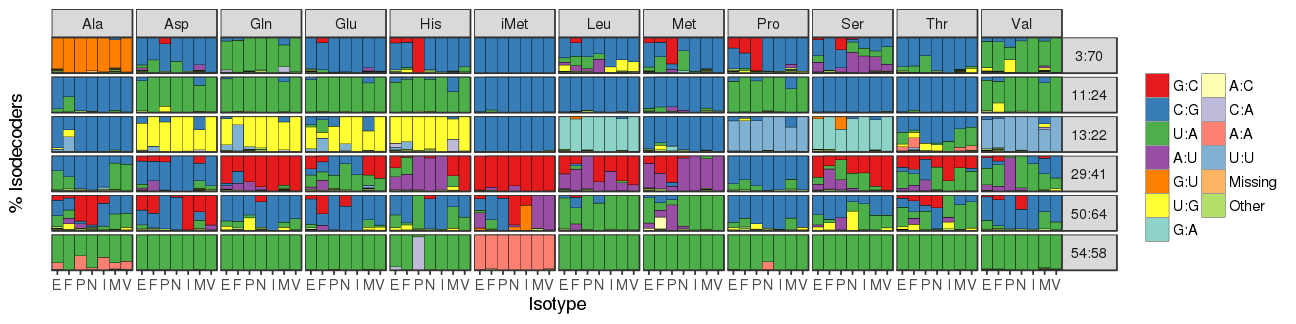

In [13]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X3.70, X11.24, X13.22, X29.41, X50.64, X54.58) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X3.70, X11.24, X13.22, X29.41, X50.64, X54.58) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  mutate(identity = ifelse(identity %in% c("A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U"), "Missing", identity)) %>%
  filter(identity %in% c("G:C", "C:G", "U:A", "A:U", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing")) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>%
  ungroup %>% rowwise %>%
  mutate(identity = ifelse(freq < 0.05, "Other", identity)) %>%
  ungroup %>%
  mutate(positions = revalue(positions, c('X3.70' = '3:70', 'X11.24' = '11:24', 'X13.22' = '13:22', 'X29.41' = '29:41', 'X50.64' = '50:64', 'X54.58' = '54:58')),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("G:C", "C:G", "U:A", "A:U", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other"))) %>%
  mutate(positions = factor(positions, levels = c('3:70', '11:24', '13:22', '29:41', '50:64', '54:58')),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes)) %>%
  filter(isotype %in% c('Ala', 'Asp', 'Gln', 'Glu', 'His', 'iMet', 'Leu', 'Met', 'Pro', 'Ser', 'Thr', 'Val')) %>%
  ggplot() + geom_bar(aes(x = clade, y = freq, fill = identity), width = 1, color = 'black', size = 0.1, stat = 'identity') +
    facet_grid(positions ~ isotype, scales = "free") +
    scale_fill_manual(values = c(brewer.pal(6, "Set1"), brewer.pal(7, "Set3"), "gray60")) + 
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(expand = c(0, 0)) +
    xlab("Isotype") + ylab("% Isodecoders") +
    theme(axis.title.x = element_text(margin = margin(t = 5)),
          axis.title.y = element_text(margin = margin(r = 15)),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          strip.text.y = element_text(angle = 0),
          panel.spacing = unit(0.15, "lines"),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          legend.title = element_blank()) +
    guides(fill = guide_legend(ncol = 2))

options(repr.plot.width=10.8, repr.plot.height=2.7)
plot
ggsave(plot, filename = "fig3a-feature-distributions.pdf", width = 10.8, height = 2.7, dpi = 300)

# Feature exceptions

## Stem mismatches

Joining, by = c("species_long", "isotype", "clade", "A:U", "C:G", "U:A", "U:G", "position")
Joining, by = c("species_long", "isotype", "clade", "C:C", "C:U", "G:C", "U:A", "U:C", "U:U", "position")


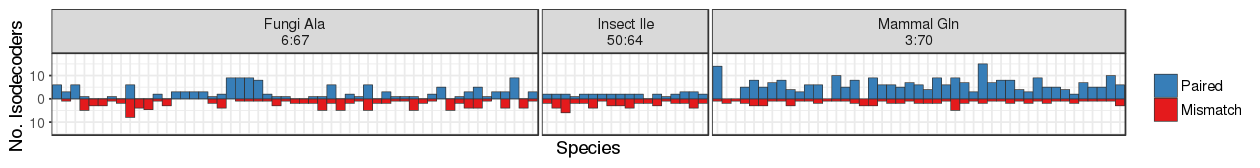

In [14]:
plot = identities %>% filter(!restrict, clade == "Fungi", isotype == 'Ala') %>% 
  count(X6.67, species_long, isotype, clade) %>% 
  spread(X6.67, n, 0) %>%
  mutate(position = '6:67') %>%
  full_join(identities %>% filter(!restrict, clade == "Mammal", isotype == "Gln") %>% 
              count(X3.70, species_long, isotype, clade) %>%
              spread(X3.70, n, 0) %>%
              mutate(position = '3:70')) %>%
  full_join(identities %>% filter(!restrict, clade == "Insect", isotype == "Ile") %>% 
              count(X50.64, species_long, isotype, clade) %>%
              spread(X50.64, n, 0) %>%
              mutate(position = '50:64', clade = 'Insect')) %>%
  replace(is.na(.), 0) %>%
  gather(feature, n, -species_long, -isotype, -clade, -position) %>%
  ungroup %>%
  mutate(mismatch = !(feature %in% c('A:U', 'C:G', 'G:C', 'G:U', 'U:A', 'U:G'))) %>%
  group_by(species_long, isotype, clade, position) %>% summarize(Paired = sum(ifelse(mismatch, 0, n)), Mismatch = -sum(ifelse(mismatch, n, 0))) %>%
  gather(matchcol, value, Paired, Mismatch) %>%
  mutate(matchcol = relevel(factor(matchcol), "Paired")) %>%
  ungroup %>%
  mutate(species_long = str_extract(species_long, '^\\w+ \\w+')) %>%
  group_by(species_long, isotype, clade, position, matchcol) %>%
  summarize(value = mean(value)) %>%
  ungroup %>%
  mutate(clade = paste0(clade, ' ', isotype, '\n', position)) %>%
  ggplot() + geom_bar(aes(x = species_long, y = value, fill = matchcol), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(~ clade, scales = 'free_x', space = 'free_x') + 
    scale_y_continuous(labels = c('10', '0', '10'), breaks = c(-10, 0, 10), limits = c(-14, 18)) +
    scale_fill_brewer(palette = 'Set1', direction = -1) + 
#     ylim(-14, 18) +
    theme(axis.text.x = element_blank(),
          axis.title.y = element_text(margin = margin(r = 4)),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.ticks.x = element_blank(),
          axis.ticks.length = unit(0.1, "lines"),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing.x = unit(0.15, "lines"),
          legend.title = element_blank()) +
    labs(x = "Species", y = "   No. Isodecoders")

options(repr.plot.width=10.5, repr.plot.height=1.4)
plot
ggsave(plot, filename = "fig3b-mismatch.pdf", width = 10.5, height = 1.4, dpi = 300)

## Exceptions to Y11:R24

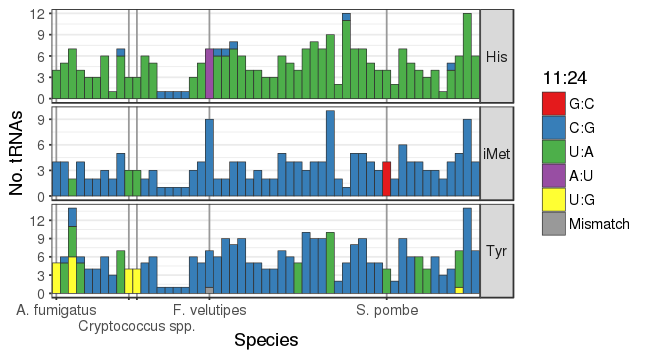

In [44]:
plot = identities %>%
  filter(clade == 'Fungi') %>%
  filter(isotype %in% c('His', 'iMet', 'Tyr')) %>%
  mutate(X11.24 = ifelse(X11.24 %in% c('G:C', 'C:G', 'U:A', 'A:U', 'G:U', 'U:G'), X11.24, 'Mismatch')) %>%
  mutate(X11.24 = factor(X11.24, levels = c('G:C', 'C:G', 'U:A', 'A:U', 'G:U', 'U:G', 'Mismatch'))) %>%
  group_by(abbrev, clade, isotype, X11.24) %>%
  filter(species_long == species_long[1]) %>%
  count(species_long, abbrev, isotype, clade, X11.24) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X11.24), width = 1, color = 'gray20', size = 0.2, position = 'stack', stat = 'identity') +
    facet_grid(isotype ~ ., scales = 'free', space = 'free_x') +
    scale_fill_manual(values = c(brewer.pal(6, "Set1")[c(1,2,3,4,6)], "gray60")) + 
    scale_y_continuous(breaks = c(0, 3, 6, 9, 12)) +
    scale_x_discrete(breaks = c('Schizosaccharomyces pombe', 'Flammulina velutipes', 'Aspergillus fumigatus', 'Cryptococcus neoformans', 'Cryptococcus gattii'),
                     labels = c('S. pombe', 'F. velutipes', 'A. fumigatus', '\nCryptococcus spp.', '')) +
    theme(axis.title.y = element_text(margin = margin(r = 4)),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.ticks.length = unit(0.1, "lines"),
          strip.text.y = element_text(margin = margin(0,2,0,2, "pt"), angle = 0),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing = unit(0.15, "lines"),
          panel.grid.major.x = element_line(color = 'gray60')) +
    guides(fill = guide_legend(title = "11:24")) +
  labs(x = 'Species', y = 'No. tRNAs')

options(repr.plot.width=5.4, repr.plot.height=3)
plot
ggsave(plot, filename = "fig3c-Y11-R24.pdf", width = 5.4, height = 3, dpi = 300)

## Replacement of mismatch U13:U22 by C13:G22

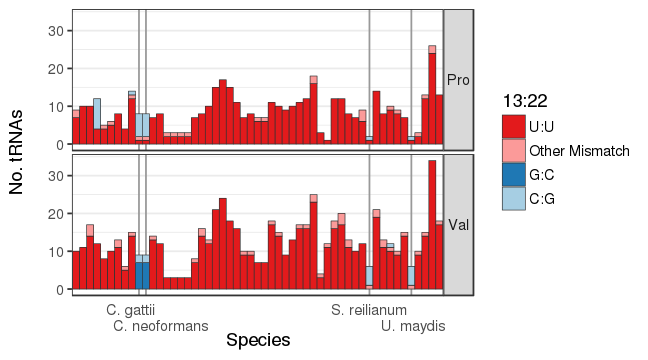

In [16]:
plot = identities %>% 
  filter(clade == 'Fungi', isotype %in% c('Pro', 'Val')) %>%
  mutate(X13.22 = ifelse(X13.22 %in% c('A:U', 'U:A', 'U:G', 'G:U'), 'Other Paired', X13.22)) %>%
  mutate(X13.22 = ifelse(X13.22 %in% c('C:G', 'G:C', 'U:U'), X13.22, 'Other Mismatch')) %>%
  group_by(abbrev, clade, isotype, X13.22) %>%
  filter(species_long == species_long[1]) %>%
  count(isotype, clade, species_long, abbrev, X13.22) %>%
  ungroup %>%
  mutate(X13.22 = factor(X13.22, rev(c('U:U', 'Other Mismatch', 'G:C', 'C:G', 'Other Paired')))) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X13.22), width = 1, color = 'gray20', size = 0.2, stat = 'identity', position = 'stack') +
    facet_grid(isotype ~ ., scale = "free_x", space = "free") + 
    scale_y_continuous(breaks = pretty_breaks()) +
    scale_fill_manual(values = brewer.pal(6, 'Paired')[c(1,2,5,6)]) +
    scale_x_discrete(breaks = c('Cryptococcus neoformans', 'Cryptococcus gattii', 'Sporisorium reilianum', 'Ustilago maydis'),
                     labels = c('', 'C. gattii    \n           C. neoformans', 'S. reilianum\n                      U. maydis', '')) +
    theme(axis.ticks.x = element_blank(),
          axis.title.x = element_text(margin = margin(t = 2)),
          axis.title.y = element_text(margin = margin(r = 15)),          
          strip.text.y = element_text(margin = margin(0,2,0,2, "pt"), angle = 0),
          legend.key.width = unit(1, "lines"),
          legend.key.height = unit(1, "lines"),
          panel.spacing = unit(0.15, "lines"),
          panel.grid.major.x = element_line(color = 'gray60')) +
    guides(fill = guide_legend(reverse = TRUE, title = "13:22")) +
  labs(x = 'Species', y = 'No. tRNAs')

options(repr.plot.width=5.4, repr.plot.height=3)
plot
ggsave(plot, filename = 'fig3d-U13-U22.pdf', width = 5.4, height = 3, dpi = 300)

# Supplementary tables & figures

## Clade-isotype restricted set stats

In [17]:
df = identities %>% group_by(isotype, clade) %>% summarize(tRNAs = n()) %>%
  left_join(identities %>% filter(primary) %>% group_by(isotype, clade) %>% summarize(Analyzed = n()), by = c('isotype', 'clade')) %>%
  left_join(identities %>% filter(duplicate) %>% group_by(isotype, clade) %>% summarize(Duplicate = n()), by = c('isotype', 'clade')) %>%
  replace_na(list(Duplicate = 0)) %>%
  mutate(isotype = factor(isotype, levels = isotypes)) %>%
  ungroup

df = df %>% rbind(df %>% group_by(clade) %>% summarize(isotype = "All", tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype) %>% summarize(clade = 'All', tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(c(clade = 'All', isotype = 'All', tRNAs = sum(df$tRNAs), Analyzed = sum(df$Analyzed), Duplicate = sum(df$Duplicate))) %>%
  group_by(isotype, clade) %>% 
  summarize(count = paste0(Analyzed, '-', Duplicate, ' (', tRNAs, ')')) %>%
  spread(clade, count) %>%
  na.omit %>%
  kable(format = 'html') %>% paste0(collapse = '\n') %>% display_html()

isotype,All,Fungi,Insect,Mammal,Nematode,Plant,Vertebrate
Ala,1997-16745 (19275),300-564 (864),97-220 (317),1046-14690 (16269),97-288 (385),237-645 (882),220-338 (558)
Arg,2436-2751 (5519),447-516 (963),162-197 (359),957-768 (2040),154-287 (441),387-485 (889),329-498 (827)
Asn,930-1445 (2375),149-278 (427),33-109 (142),353-398 (751),39-164 (203),214-245 (459),142-251 (393)
Asp,659-2041 (2744),108-469 (583),37-182 (219),274-429 (741),30-211 (241),143-446 (589),67-304 (371)
Cys,1204-4579 (5973),117-101 (218),53-62 (115),686-3950 (4826),26-102 (128),138-163 (301),184-201 (385)
Gln,1196-1431 (2638),237-257 (494),89-110 (199),450-369 (830),67-177 (244),187-241 (428),166-277 (443)
Glu,1421-5303 (7170),242-582 (826),75-225 (300),608-3385 (4437),81-326 (407),191-484 (675),224-301 (525)
Gly,1631-8993 (11428),282-680 (962),88-268 (356),729-6473 (8006),115-416 (531),223-726 (949),194-430 (624)
His,434-1056 (1493),139-176 (318),24-96 (120),130-303 (433),31-134 (165),45-207 (252),65-140 (205)
Ile,1230-1864 (3125),190-446 (636),83-115 (198),511-402 (926),70-204 (274),224-371 (613),152-326 (478)


## Species-isotype tRNA, restricted, and duplicated counts

In [18]:
df = identities %>% group_by(isotype, species_long, clade) %>% summarize(tRNAs = n()) %>%
  left_join(identities %>% filter(!restrict) %>% group_by(isotype, species_long, clade) %>% summarize(Analyzed = n()), by = c('isotype', 'species_long', 'clade')) %>%
  left_join(identities %>% filter(duplicate) %>% group_by(isotype, species_long, clade) %>% summarize(Duplicate = n()), by = c('isotype', 'species_long', 'clade')) %>%
  replace_na(list(Duplicate = 0)) %>%
  mutate(isotype = factor(isotype, levels = isotypes)) %>%
  ungroup %>%
  complete(isotype, nesting(species_long, clade), fill = list(tRNAs = 0, Analyzed = 0, Duplicate = 0))

df = df %>% rbind(df %>% group_by(clade, species_long) %>% summarize(isotype = "All", tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(df %>% group_by(clade) %>% summarize(isotype = "All", species_long = "All", tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(df %>% group_by(isotype) %>% summarize(species_long = 'All', clade = 'All', tRNAs = sum(tRNAs), Analyzed = sum(Analyzed), Duplicate = sum(Duplicate)) %>% ungroup) %>%
  rbind(c(clade = 'All', species_long = 'All', isotype = 'All', tRNAs = sum(df$tRNAs), Analyzed = sum(df$Analyzed), Duplicate = sum(df$Duplicate))) %>%
  group_by(isotype, clade, species_long) %>% 
  summarize(count = paste0(Analyzed, '-', Duplicate, ' (', tRNAs, ')')) %>%
  spread(isotype, count) %>%
  na.omit

df %>% head
write.table(df, file = 'table-s2.tsv', sep = '\t', quote = FALSE, row.names = FALSE)

,clade,species_long,Ala,Arg,Asn,Asp,Cys,Gln,Glu,Gly,⋯,Lys,Met,Phe,Pro,Ser,Thr,Trp,Tyr,Val,All
1,All,All,1997-16745 (19275),2436-2751 (5519),930-1445 (2375),659-2041 (2744),1204-4579 (5973),1196-1431 (2638),1421-5303 (7170),1631-8993 (11428),⋯,1765-3745 (6145),729-860 (1589),786-1213 (2001),1087-4261 (5442),2216-2878 (5363),1963-2366 (4531),812-1399 (2347),971-1127 (2128),1798-3476 (5623),27962-71044 (103151)
2,Fungi,Aspergillus fumigatus Af293,6-7 (13),9-7 (16),4-1 (5),2-7 (9),3-0 (3),4-4 (8),5-7 (12),4-12 (16),⋯,2-7 (9),3-1 (4),3-2 (5),5-4 (9),5-7 (12),6-5 (11),1-2 (3),1-4 (5),6-4 (10),82-97 (179)
3,Fungi,Aspergillus nidulans FGSC A4,4-9 (13),9-8 (17),5-1 (6),1-7 (8),1-2 (3),4-3 (7),4-7 (11),4-11 (15),⋯,2-8 (10),2-1 (3),2-3 (5),8-2 (10),6-6 (12),5-5 (10),1-2 (3),5-1 (6),4-7 (11),84-97 (181)
4,Fungi,Aspergillus oryzae RIB40,6-10 (16),9-12 (21),4-4 (8),3-10 (13),3-1 (4),8-4 (12),6-12 (18),4-16 (20),⋯,4-10 (14),3-1 (4),2-5 (7),5-5 (10),16-8 (24),5-9 (14),1-3 (4),10-4 (14),8-9 (17),116-132 (248)
5,Fungi,Botrytis cinerea B05.10,6-9 (15),13-5 (18),5-1 (6),1-8 (9),5-0 (5),6-2 (8),5-10 (15),8-8 (16),⋯,8-5 (13),3-1 (4),4-3 (7),3-9 (12),7-11 (18),6-3 (9),2-4 (6),3-3 (6),4-8 (12),102-104 (209)
6,Fungi,Candida albicans WO-1,3-5 (8),4-5 (9),2-1 (3),1-5 (6),2-0 (2),5-1 (6),3-4 (7),3-5 (8),⋯,4-3 (7),1-1 (2),1-4 (5),2-3 (5),5-5 (10),4-3 (7),1-1 (2),3-1 (4),5-3 (8),62-63 (125)


## Consensus elements by cutoff

In [19]:
resolve_code = function(codes) {
  codes = unique(codes)
  x = c(A = all(codes %in% 'A'),
        C = all(codes %in% 'C'),
        G = all(codes %in% 'G'),
        U = all(codes %in% 'U'),
        Absent = all(codes %in% 'Absent'),
        Purine = all(codes %in% c('A', 'G', 'Purine')),
        Pyrimidine = all(codes %in% c('C', 'U', 'Pyrimidine')),
        Weak = all(codes %in% c('A', 'U', 'Weak')),
        Strong = all(codes %in% c('G', 'C', 'Strong')),
        Amino = all(codes %in% c('A', 'C', 'Amino')),
        Keto = all(codes %in% c('G', 'U', 'Keto')),
        B = all(codes %in% c('C', 'G', 'U', 'B', 'Strong', 'Pyrimidine', 'Keto')),
        D = all(codes %in% c('A', 'G', 'U', 'D', 'Purine', 'Weak', 'Keto')),
        H = all(codes %in% c('A', 'C', 'U', 'H', 'Amino', 'Weak', 'Pyrimidine')),
        V = all(codes %in% c('A', 'C', 'G', 'V', 'Amino', 'Purine', 'Strong')),
        GC = all(codes %in% 'GC'),
        AU = all(codes %in% 'AU'),
        UA = all(codes %in% 'UA'),
        CG = all(codes %in% 'CG'),
        GU = all(codes %in% 'GU'),
        UG = all(codes %in% 'UG'),
        PurinePyrimidine = all(codes %in% c('AU', 'GC', 'PurinePyrimidine')),
        PyrimidinePurine = all(codes %in% c('UA', 'CG', 'PyrimidinePurine')),
        StrongPair = all(codes %in% c('GC', 'CG', 'StrongPair')),
        WeakPair = all(codes %in% c('AU', 'UA', 'WeakPair')),
        AminoKeto = all(codes %in% c('AU', 'CG', 'AminoKeto')),
        KetoAmino = all(codes %in% c('UA', 'GC', 'KetoAmino')),
        Wobble = all(codes %in% c('GU', 'UG', 'Wobble')),
        Paired = all(codes %in% c('AU', 'UA', 'CG', 'GC', 'GU', 'UG', 'Paired', 'PurinePyrimidine', 'PyrimidinePurine', 'StrongPair', 'WeakPair', 'AminoKeto', 'KetoAmino', 'Wobble')),
        Bulge = all(codes %in% 'Bulge'),
        Mismatched = all(codes %in% c('AA', 'GG', 'CC', 'UU', 'AG', 'AC', 'CA', 'CU', 'GA', 'UC', 'Mismatched')))
  return(names(x[which(x)]))
}

get_consensus_IDE = function(position, codes) {
  position = unique(position)
  best_codes = resolve_code(codes) # returns a vector of all possible combinations of bases. Note that this is not limited to the basic combinations given by the codes variable.
  if (length(position) != 1) stop("Multiple positions passed to function")
  if (length(codes) != 126) return("N/A") # make sure that each isotype/clade is represented
  if (length(best_codes) == 0) return("N/A")
  codes = list(A="A", C="C", G="G", U="U", Absent=c("-", ".", "-:-"), Purine=c("A", "G"), Pyrimidine=c("C", "U"), Weak=c("A", "U"), Strong=c("G", "C"), Amino=c("A", "C"), Keto=c("G", "U"), B=c("C", "G", "U"), D=c("A", "G", "U"), H=c("A", "C", "U"), V=c("A", "C", "G"), D=c("A", "G", "U"), GC="G:C", AU="A:U", UA="U:A", CG="C:G", GU="G:U", UG= "U:G", PurinePyrimidine=c("A:U", "G:C"), PyrimidinePurine=c("U:A", "C:G"), AminoKeto=c("A:U", "C:G"), KetoAmino=c("U:A", "G:C"), StrongPair=c("G:C", "C:G"), WeakPair=c("A:U", "U:A"), Wobble=c("G:U", "U:G"), Paired=c("A:U", "U:A", "C:G", "G:C", "G:U", "U:G"), Bulge=c("A:-", "U:-", "C:-", "G:-", "-:A", "-:G", "-:C", "-:U"), Mismatched=c("A:A", "G:G", "C:C", "U:U", "A:G", "A:C", "C:A", "C:U", "G:A", "U:C"))   # for each possible code, check each species
  # for each possible code, check each species
  # this ensures that we consider other IDEs if the most specific one fails the species check. For example, if "Purine" fails, we also consider "V"
  species_check = sapply(best_codes, function(code) {
    codes_str = paste0("c('", paste0(codes[[code]], collapse="', '"), "')")
    df = identities %>%
           select_('species', 'isotype', position) %>%
           group_by_('species', 'isotype') %>% 
           summarize_(match = paste0("sum(", position, " %in% ", codes_str, ")"),
                      miss = paste0("sum(!(", position, " %in% ", codes_str, "))")) %>%
           mutate(ubiquitous = (match / (match + miss)) > 0.1)
    all(df$ubiquitous)
  })
  ide = names(species_check[species_check])[1]
  return(ifelse(is.na(ide), "N/A", ide))
}

code_groups = c('A'=1, 'C'=1, 'G'=1, 'U'=1, 'Absent'=1, 
                'Purine'=2, 'Pyrimidine'=2,
                'Weak'=3, 'Strong'=3, 'Amino'=3, 'Keto'=3,
                'B'=4, 'D'=4, 'H'=4, 'V'=4,
                'GC'=1, 'AU'=1, 'UA'=1, 'CG'=1, 'GU'=1, 'UG'=1,
                'StrongPair'=2, 'WeakPair'=2, 'Wobble'=2,
                'PurinePyrimidine'=3, 'PyrimidinePurine'=3, 'AminoKeto'=3, 'KetoAmino'=3,
                'Paired'=4, 'Mismatched'=4, 'Bulge'=4)

In [20]:
display_3d_positions = c('X1.72'='1:72', 'X2.71'='2:71', 'X3.70'='3:70', 'X4.69'='4:69', 'X5.68'='5:68', 'X6.67'='6:67', 'X7.66'='7:66', 'X8'='8', 'X8.14' = '8:14', 'X9'='9', 'X10.25'='10:25', 'X11.24'='11:24', 'X12.23'='12:23', 'X13.22'='13:22', 'X14'='14', 'X15'='15', 'X15.48' = '15:48', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X18.55' = '18:55', 'X19'='19', 'X19.56' = '19:56', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X26'='26','X27.43'='27:43', 'X28.42'='28:42', 'X29.41'='29:41', 'X30.40'='30:40', 'X31.39'='31:39', 'X32'='32', 'X33'='33', 'X34'='34', 'X35'='35', 'X36'='36', 'X37'='37', 'X38'='38', 'X44'='44', 'X45'='45', 'X46'='46', 'X47'='47', 'X48'='48', 'X49.65'='49:65', 'X50.64'='50:64', 'X51.63'='51:63', 'X52.62'='52:62', 'X53.61'='53:61', 'X54'='54', 'X54.58' = '54:58', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X73'='73')
cutoff_freqs = data.frame()
for (cutoff in c(0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99)) {
  df = clade_iso_freqs %>%
    group_by(positions, feature) %>%
    summarize(count = sum(n), freq = sum(n)/sum(clade_iso_pos_total)) %>%
    filter(freq >= cutoff) %>%
    mutate(cutoff = as.character(cutoff)) %>%
    group_by(positions) %>%
    arrange(code_groups[feature], desc(freq)) %>%
    filter(row_number(positions) == 1)
  if (nrow(cutoff_freqs) == 0) cutoff_freqs = df
  else cutoff_freqs = rbind(cutoff_freqs, df)
}

cutoff_freqs %>% 
  mutate(feature = as.character(feature)) %>%
  bind_rows(consensus %>% mutate(feature = identity, freq = 0.9, cutoff = "Consensus") %>% select(positions, feature, freq, cutoff)) %>%
  filter(positions %in% c(names(single_positions), names(paired_positions), c('X8.14', 'X15.48', 'X18.55', 'X19.56', 'X54.58'))) %>%
  select(positions, cutoff, feature) %>%
  group_by(positions) %>%
  spread(cutoff, feature) %>%
  ungroup %>%
  mutate(positions = factor(display_3d_positions[positions], levels = display_3d_positions)) %>%
  arrange(positions) %>%
  kable %>% paste0(collapse = '\n') %>% display_markdown

|positions |0.5              |0.6              |0.7              |0.8              |0.9              |0.95             |0.99       |Consensus  |
|:---------|:----------------|:----------------|:----------------|:----------------|:----------------|:----------------|:----------|:----------|
|1:72      |GC               |GC               |GC               |StrongPair       |Paired           |Paired           |NA         |NA         |
|2:71      |StrongPair       |StrongPair       |StrongPair       |Paired           |Paired           |Paired           |NA         |Paired     |
|3:70      |StrongPair       |StrongPair       |Paired           |Paired           |Paired           |Paired           |NA         |NA         |
|4:69      |StrongPair       |Paired           |Paired           |Paired           |Paired           |Paired           |NA         |NA         |
|5:68      |StrongPair       |Paired           |Paired           |Paired           |Paired           |Paired           |NA         |NA         |
|6:67      |Paired           |Paired           |Paired           |Paired           |Paired           |Paired           |NA         |NA         |
|7:66      |PurinePyrimidine |PurinePyrimidine |PurinePyrimidine |Paired           |Paired           |Paired           |NA         |NA         |
|8         |U                |U                |U                |U                |U                |U                |U          |Weak       |
|8:14      |UA               |UA               |UA               |UA               |UA               |UA               |UA         |NA         |
|9         |G                |Purine           |Purine           |Purine           |Purine           |Purine           |NA         |NA         |
|10:25     |GC               |GC               |GC               |Paired           |Paired           |Paired           |Paired     |Paired     |
|11:24     |CG               |CG               |PyrimidinePurine |PyrimidinePurine |PyrimidinePurine |PyrimidinePurine |Paired     |Paired     |
|12:23     |StrongPair       |PyrimidinePurine |PyrimidinePurine |Paired           |Paired           |Paired           |NA         |NA         |
|13:22     |PyrimidinePurine |Paired           |NA               |NA               |NA               |NA               |NA         |NA         |
|14        |A                |A                |A                |A                |A                |A                |A          |A          |
|15        |G                |G                |G                |G                |Purine           |Purine           |NA         |NA         |
|15:48     |GC               |GC               |GC               |PurinePyrimidine |PurinePyrimidine |Paired           |NA         |NA         |
|16        |U                |U                |U                |Pyrimidine       |B                |NA               |NA         |NA         |
|17        |Absent           |Absent           |NA               |NA               |NA               |NA               |NA         |NA         |
|17a       |Absent           |Absent           |Absent           |Absent           |Absent           |Absent           |Absent     |NA         |
|18        |G                |G                |G                |G                |G                |G                |G          |Purine     |
|18:55     |GU               |GU               |GU               |GU               |GU               |GU               |Paired     |Paired     |
|19        |G                |G                |G                |G                |G                |G                |G          |G          |
|19:56     |GC               |GC               |GC               |GC               |GC               |GC               |Paired     |GC         |
|20        |U                |U                |U                |U                |H                |NA               |NA         |NA         |
|20a       |Pyrimidine       |NA               |NA               |NA               |NA               |NA               |NA         |NA         |
|20b       |Absent           |Absent           |Absent           |Absent           |Absent           |NA               |NA         |NA         |
|21        |A                |A                |A                |A                |A                |A                |Weak       |NA         |
|26        |G                |Purine           |Purine           |Purine           |D                |D                |NA         |NA         |
|27:43     |PyrimidinePurine |PyrimidinePurine |PyrimidinePurine |Paired           |Paired           |Paired           |NA         |NA         |
|28:42     |PyrimidinePurine |PyrimidinePurine |PyrimidinePurine |Paired           |Paired           |Paired           |NA         |NA         |
|29:41     |KetoAmino        |Paired           |Paired           |Paired           |Paired           |Paired           |NA         |Paired     |
|30:40     |GC               |GC               |GC               |StrongPair       |Paired           |Paired           |NA         |NA         |
|31:39     |WeakPair         |AminoKeto        |AminoKeto        |Paired           |Paired           |Paired           |NA         |NA         |
|32        |C                |C                |C                |Pyrimidine       |Pyrimidine       |Pyrimidine       |NA         |Pyrimidine |
|33        |U                |U                |U                |U                |U                |U                |Pyrimidine |Pyrimidine |
|34        |Pyrimidine       |B                |B                |B                |NA               |NA               |NA         |NA         |
|35        |Pyrimidine       |H                |H                |NA               |NA               |NA               |NA         |NA         |
|36        |Pyrimidine       |H                |H                |H                |NA               |NA               |NA         |NA         |
|37        |A                |A                |A                |Purine           |Purine           |Purine           |NA         |Purine     |
|38        |A                |A                |Weak             |H                |H                |H                |NA         |H          |
|44        |A                |A                |Purine           |Weak             |D                |NA               |NA         |NA         |
|45        |G                |G                |G                |Purine           |NA               |NA               |NA         |NA         |
|46        |G                |G                |G                |Purine           |Purine           |Purine           |NA         |NA         |
|47        |U                |Pyrimidine       |NA               |NA               |NA               |NA               |NA         |NA         |
|48        |C                |C                |C                |Pyrimidine       |Pyrimidine       |Pyrimidine       |NA         |NA         |
|49:65     |StrongPair       |StrongPair       |StrongPair       |StrongPair       |Paired           |Paired           |NA         |Paired     |
|50:64     |StrongPair       |PyrimidinePurine |PyrimidinePurine |Paired           |Paired           |Paired           |NA         |NA         |
|51:63     |GC               |GC               |StrongPair       |Paired           |Paired           |Paired           |NA         |NA         |
|52:62     |GC               |GC               |GC               |PurinePyrimidine |PurinePyrimidine |Paired           |NA         |NA         |
|53:61     |GC               |GC               |GC               |GC               |GC               |GC               |Paired     |KetoAmino  |
|54        |U                |U                |U                |U                |U                |U                |Weak       |H          |
|54:58     |UA               |UA               |UA               |UA               |UA               |UA               |NA         |NA         |
|55        |U                |U                |U                |U                |U                |U                |U          |Pyrimidine |
|56        |C                |C                |C                |C                |C                |C                |NA         |C          |
|57        |G                |G                |Purine           |Purine           |Purine           |Purine           |Purine     |Purine     |
|58        |A                |A                |A                |A                |A                |A                |NA         |D          |
|59        |Purine           |Weak             |Weak             |D                |D                |NA               |NA         |NA         |
|60        |U                |Pyrimidine       |Pyrimidine       |Pyrimidine       |Pyrimidine       |H                |NA         |NA         |
|73        |A                |Purine           |Purine           |Purine           |D                |NA               |NA         |NA         |

## Clade-specific sequence features

In [21]:
plot = clade_isotype_specific %>% 
  filter(positions %in% names(display_positions)) %>%
  mutate(positions = factor(positions, names(display_positions))) %>%
  ungroup() %>%
  mutate(isotype = factor(isotype, levels = rev(isotypes))) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(paired_positions), clade = unique(clade_isotype_specific$clade), identity = 'X')) %>%
  rbind(expand.grid(isotype = isotypes, positions = names(single_positions), clade = unique(clade_isotype_specific$clade), identity = 'N')) %>%
  group_by(isotype, clade, positions) %>%
  summarize(identity = ifelse((length(identity) > 1) & (identity[1] %in% c('X', 'N')), identity[2], identity[1])) %>%  mutate(left=get_5prime(identity), right=get_3prime(identity)) %>%
  mutate(left = get_5prime(identity), right = get_3prime(identity)) %>%
  gather(side, half_identity, left, right, -isotype, -clade, -positions, -identity) %>%
  mutate(half_identity = revalue(half_identity, simple_identities, warn_missing = FALSE), identity = revalue(identity, simple_identities, warn_missing = FALSE)) %>% 
  mutate(side = as.integer(as.factor(side)) - 1) %>% 
  mutate(xmin = as.integer(positions) + 0.5 * side - 0.5 + 0.1 * (1 - side),
         xmax = as.integer(positions)+ 0.5 * side - 0.1 * side,
         ymin = as.integer(isotype) - 0.5 + 0.1,
         ymax = as.integer(isotype) + 0.5 - 0.1) %>%
  mutate(half_identity=factor(half_identity)) %>% 
  ggplot() + 
    geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = half_identity)) + 
    geom_tile(aes(x = positions, y = isotype, color = identity), alpha = 0, width = 0.85, height = 0.85, size = 0.4) + 
    facet_wrap(~ clade, nrow = 2, scales = "free") +
    scale_x_discrete(labels = display_positions, drop = FALSE) +
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_color_manual(breaks = simple_identities, values = colors) + 
    scale_fill_manual(breaks = simple_identities, values = fills) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5), legend.position = "bottom") +
    guides(fill = guide_legend(title = NULL, nrow = 2), color = guide_legend(title = NULL, nrow = 2), alpha = FALSE) +
    xlab('Position') + ylab('Isotype') + coord_equal()

# options(repr.plot.width=37, repr.plot.height=12.1)
# plot
ggsave(filename = 'figS1-clade-isotype-heatmap.pdf', plot = plot, width = 37, height = 12)

## Stem and loop sizes

In [22]:
match_identities = c("A:U", "U:A", "G:U", "U:G", "C:G", "G:C")
mismatch_identities = c("A:G", "G:A", "A:C", "C:A", "C:U", "U:C", "A:A", "C:C", "U:U", "G:G", "-:-", "A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U")
resolve_match = Vectorize(function(feature) ifelse(feature %in% match_identities, '|', ':'))
get_stem_length = Vectorize(function(stem_length, stem_string) (stem_length - unlist(str_locate(reverse(stem_string), '\\|'))[1] + 1) - unlist(str_locate(stem_string, '\\|'))[1] + 1)

stemloop = identities %>% filter(!restrict) %>%
  rowwise() %>%
  mutate(Astem = get_stem_length(7, paste0(resolve_match(X1.72), resolve_match(X2.71), resolve_match(X3.70), resolve_match(X4.69), resolve_match(X5.68), resolve_match(X6.67), resolve_match(X7.66))),
         Dstem = get_stem_length(4, paste0(resolve_match(X10.25), resolve_match(X11.24), resolve_match(X12.23), resolve_match(X13.22))),
         Cstem = get_stem_length(5, paste0(resolve_match(X27.43), resolve_match(X28.42), resolve_match(X29.41), resolve_match(X30.40), resolve_match(X31.39))),
         TPCstem = get_stem_length(5, paste0(resolve_match(X49.65), resolve_match(X50.64), resolve_match(X51.63), resolve_match(X52.62), resolve_match(X53.61)))) %>%
  select(isotype, Astem, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype) %>%
  summarize(Astem = mean(Astem, na.rm = TRUE), Dstem = mean(Dstem), Dloop = mean(D.loop), Cstem = mean(Cstem), Cloop = mean(AC.loop), TPCloop = mean(TPC.loop), TPCstem = mean(TPCstem), Varm = mean(V.arm)) %>%
  gather(region, size, -isotype) %>%
  mutate(region = factor(region)) %>% 
  ungroup

stemloop = rbind(stemloop, cbind(expand.grid(isotype = unique(stemloop$isotype), region = levels(stemloop$region)), size=0))

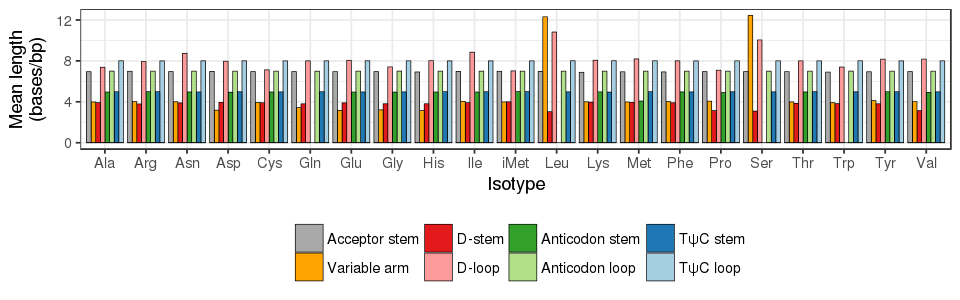

In [23]:
plot = stemloop %>% 
  mutate(region = revalue(region, c("Astem" = "Acceptor stem ", "Varm" = "Variable arm ", "Dstem" = "D-stem ", "Dloop" = "D-loop ", "Cstem" = "Anticodon stem ", "Cloop" = "Anticodon loop ", "TPCstem" = sprintf("T\u03c8C stem "), "TPCloop" = sprintf("T\u03c8C loop ")))) %>%
  mutate(region = factor(region, c("Acceptor stem ", "Variable arm ", "D-stem ", "D-loop ", "Anticodon stem ", "Anticodon loop ", sprintf("T\u03c8C stem "), sprintf("T\u03c8C loop ")))) %>%
  ggplot() + geom_bar(aes(x = isotype, y = size, fill = region), stat = 'identity', size = 0.2, color = 'black', position = 'dodge') +
    scale_fill_manual(values = c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(legend.position = "bottom") +
    xlab("Isotype") + ylab("Mean length\n(bases/bp)") +
    guides(fill = guide_legend(title = NULL))

options(repr.plot.width=8, repr.plot.height=2.5)
plot
ggsave(plot, filename = 'figS2a-stemloops.pdf', width = 8, height = 2.5, device = cairo_pdf)

In [24]:
stemloop = identities %>% filter(!restrict) %>%
  rowwise() %>%
  mutate(Astem = get_stem_length(7, paste0(resolve_match(X1.72), resolve_match(X2.71), resolve_match(X3.70), resolve_match(X4.69), resolve_match(X5.68), resolve_match(X6.67), resolve_match(X7.66))),
         Dstem = get_stem_length(4, paste0(resolve_match(X10.25), resolve_match(X11.24), resolve_match(X12.23), resolve_match(X13.22))),
         Cstem = get_stem_length(5, paste0(resolve_match(X27.43), resolve_match(X28.42), resolve_match(X29.41), resolve_match(X30.40), resolve_match(X31.39))),
         TPCstem = get_stem_length(5, paste0(resolve_match(X49.65), resolve_match(X50.64), resolve_match(X51.63), resolve_match(X52.62), resolve_match(X53.61)))) %>%
  select(isotype, clade, Astem, Dstem, D.loop, Cstem, AC.loop, V.arm, TPCstem, TPC.loop) %>%
  group_by(isotype, clade) %>%
  summarize(Astem = mean(Astem, na.rm = TRUE), Dstem = mean(Dstem), Dloop = mean(D.loop), Cstem = mean(Cstem), Cloop = mean(AC.loop), TPCloop = mean(TPC.loop), TPCstem = mean(TPCstem), Varm = mean(V.arm)) %>%
  gather(region, size, -isotype, -clade) %>%
  mutate(region = factor(region)) %>% 
  ungroup

stemloop = rbind(stemloop, cbind(expand.grid(isotype = unique(stemloop$isotype), clade = unique(stemloop$clade), region = levels(stemloop$region)), size=0))

In [25]:
plot = stemloop %>% 
  mutate(region = revalue(region, c("Astem" = "Acceptor stem ", "Varm" = "Variable arm ", "Dstem" = "D-stem ", "Dloop" = "D-loop ", "Cstem" = "Anticodon stem ", "Cloop" = "Anticodon loop ", "TPCstem" = sprintf("T\u03c8C stem "), "TPCloop" = sprintf("T\u03c8C loop ")))) %>%
  mutate(region = factor(region, c("Acceptor stem ", "Variable arm ", "D-stem ", "D-loop ", "Anticodon stem ", "Anticodon loop ", sprintf("T\u03c8C stem "), sprintf("T\u03c8C loop ")))) %>%
  ggplot() + geom_bar(aes(x = isotype, y = size, fill = region), stat = 'identity', size = 0.2, color = 'black', position = 'dodge') +
    facet_wrap(~ clade, scales = "free") +
    scale_fill_manual(values = c("darkgray", "orange", rev(brewer.pal(6, "Paired")))) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(legend.position = "bottom") +
    xlab("Isotype") + ylab("Mean length (bases/bp)") +
    guides(fill = guide_legend(title = NULL))

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(plot, filename = 'figS8a-clade-stemloops.pdf', width = 24, height = 5, device = cairo_pdf)

## D loop insertions

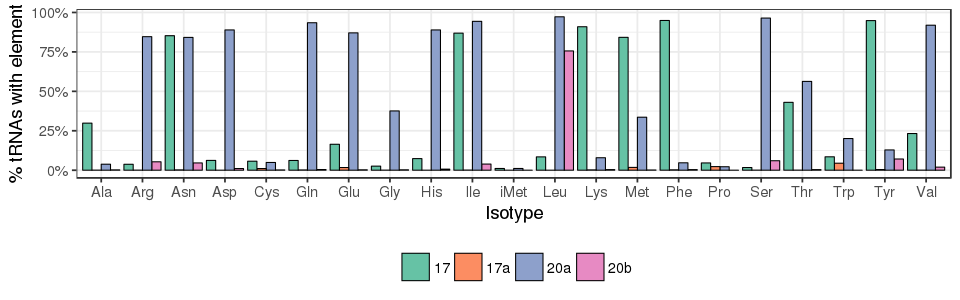

In [26]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

options(repr.plot.width=8, repr.plot.height=2.5)
plot
ggsave(filename = 'figS2b-dloop-insertions.pdf', plot = plot, width = 8, height = 2.5)

In [27]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X17, X17a, X20a, X20b) %>%
  mutate(X17 = X17 != '-', X17a=X17a != '-', X20a=X20a != '-', X20b=X20b != '-') %>%
  group_by(isotype, clade) %>%
  summarize(`17` = mean(X17), `17a` = mean(X17a), `20a` = mean(X20a), `20b` = mean(X20b)) %>%
  gather(position, freq, -isotype, -clade) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = position), stat = 'identity', color = 'black', size = 0.3, position = 'dodge') +
    facet_wrap(~ clade, scales = "free") +
    scale_y_continuous(labels = percent_format()) +
    scale_fill_manual(values = brewer.pal(4, "Set2")) +
    theme(legend.position = "bottom") +
    labs(x = "Isotype", y = "% tRNAs with element") +
    guides(fill = guide_legend(title = NULL))

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS8b-clade-dloop-insertions.pdf', plot = plot, width = 24, height = 5)

## Intron length

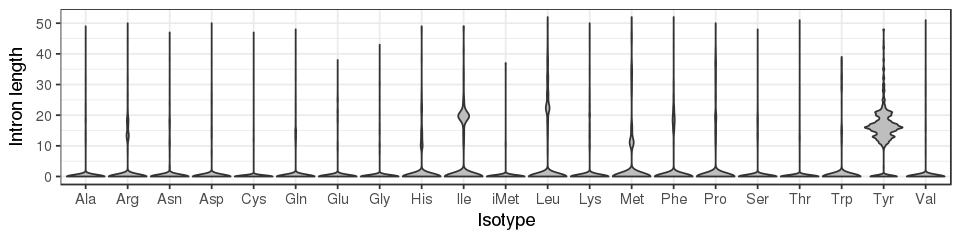

In [28]:
intron_cutoff = identities %>% filter(!restrict) %>% group_by(isotype) %>%
  summarize(quantile = quantile(intron, p = 0.97)) %>%
  summarize(max(quantile)) %>% unlist %>% unname

plot = identities %>% filter(!restrict, intron < intron_cutoff) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron), fill = 'gray', scale = 'width', adjust = 0.5) +
    theme(legend.position = "none") +
    labs(y = "Intron length", x = "Isotype")

options(repr.plot.width=8, repr.plot.height=2)
plot
ggsave(filename = 'figS2c-introns.pdf', plot = plot, width = 8, height = 2)

In [29]:
intron_cutoff = identities %>% filter(!restrict) %>% group_by(isotype, clade) %>%
  summarize(quantile = quantile(intron, p = 0.97)) %>%
  summarize(max(quantile)) %>% unlist %>% unname

plot = identities %>% filter(!restrict, intron < intron_cutoff) %>% select(isotype, clade, intron) %>%
  ggplot() + geom_violin(aes(x = isotype, y = intron, fill = clade), scale = 'width', adjust = 0.5) +
    facet_wrap(~ clade, scales = "free_x") + 
    theme(legend.position = "none") +
    labs(y = "Intron length", x = "Isotype")

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS8c-clade-introns.pdf', plot = plot, width = 24, height = 5)

## N1 and N73 identity

In [30]:
n1n73 = identities %>% filter(!restrict) %>%
  select(isotype, X1, X73)%>%
  gather(position, identity, X1, X73) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, position) %>%
  mutate(freq = count/sum(count))

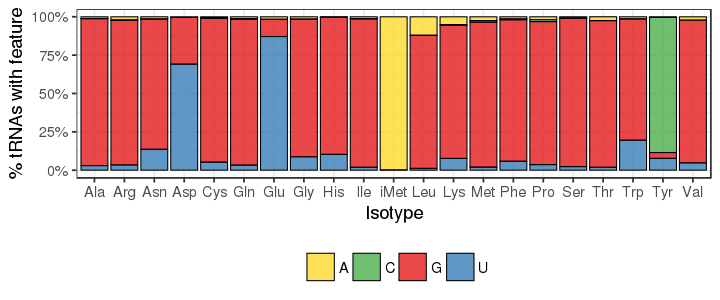

In [31]:
plot = n1n73 %>% filter(position == "N1") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

options(repr.plot.width=6, repr.plot.height=2.5)
plot
ggsave(filename = 'figS2d-N1.pdf', plot = plot, width = 6, height = 2.5)

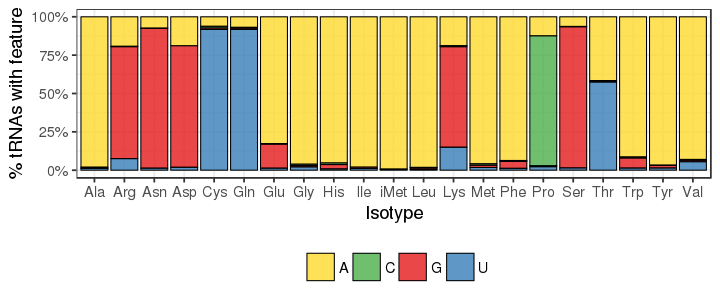

In [32]:
plot = n1n73 %>% filter(position == "N73") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

options(repr.plot.width=6, repr.plot.height=2.5)
plot
ggsave(filename = 'figS2e-N73.pdf', plot = plot, width = 6, height = 2.5)

In [33]:
n1n73 = identities %>% filter(!restrict) %>%
  select(isotype, clade, X1, X73)%>%
  gather(position, identity, X1, X73, -clade) %>%
  mutate(position = revalue(position, c('X1' = 'N1', 'X73' = 'N73'))) %>%
  filter(identity %in% c("A", "C", "G", "U")) %>%
  group_by(isotype, clade, position, identity) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade, position) %>%
  mutate(freq = count/sum(count))

In [34]:
plot = n1n73 %>% filter(position == "N1") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ clade, scales = 'free') +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

# options(repr.plot.width=20, repr.plot.height=5)
# plot
ggsave(filename = 'figS8d-clade-N1.pdf', plot = plot, width = 20, height = 5)

In [35]:
plot = n1n73 %>% filter(position == "N73") %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = identity), size = 0.3, alpha = 0.8, color = 'black', stat = 'identity') +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    scale_y_continuous(labels = percent) +
    facet_wrap(~ clade, scales = 'free') +
    theme(legend.position='bottom') +
    labs(fill = '', x = 'Isotype', y = '% tRNAs with feature')

# options(repr.plot.width=20, repr.plot.height=5)
# plot
ggsave(filename = 'figS8e-clade-N73.pdf', plot = plot, width = 20, height = 5)

## A and B box base frequencies

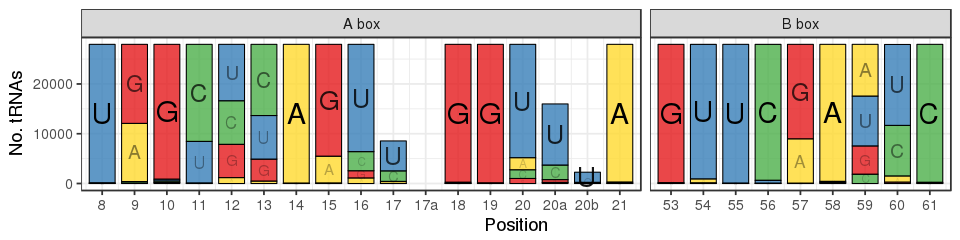

In [36]:
ab_positions = c('X8'='8', 'X9'='9', 'X10'='10', 'X11'='11', 'X12'='12', 'X13'='13', 'X14'='14', 'X15'='15', 'X16'='16', 'X17'='17', 'X17a'='17a', 'X18'='18', 'X19'='19', 'X20'='20', 'X20a'='20a', 'X20b'='20b', 'X21'='21', 'X53'='53', 'X54'='54', 'X55'='55', 'X56'='56', 'X57'='57', 'X58'='58', 'X59'='59', 'X60'='60', 'X61'='61')

plot = identities %>% 
  filter(!restrict) %>%
  select(isotype, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity) %>%
  summarize(Count = n()) %>%
  group_by(Position) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax)))) %>%
  ungroup %>%
  ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
    geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
    facet_grid(~ feature, space = 'free', scales = 'free') +
    scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    theme(legend.position='none') +
    labs(fill = '', x = 'Position', y = 'No. tRNAs')

options(repr.plot.width=8, repr.plot.height=2)
plot
ggsave(plot, filename = 'figS2f-ABbox.pdf', width = 8, height = 2)

In [37]:
df = identities %>% 
  filter(!restrict) %>%
  select(isotype, clade, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X20a, X20b, X21, X53, X54, X55, X56, X57, X58, X59, X60, X61) %>%
  gather(Position, Identity, -isotype, -clade) %>%
  mutate(Position = factor(Position, names(ab_positions))) %>%
  filter(Identity %in% c("A", "C", "G", "U") & !(isotype %in% c("Sup", "SeC"))) %>%
  group_by(Position, Identity, clade) %>%
  summarize(Count = n()) %>%
  group_by(Position, clade) %>%
  mutate(freq = round(Count / sum(Count), digits = 1)) %>%
  mutate(feature = ifelse(Position %in% c('X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61'), 'B box', 'A box')) %>%
  mutate(order = rank(Count)) %>% 
  arrange(order) %>% 
  mutate(ymax = cumsum(Count),
         xmin = as.integer(Position) - 0.4,
         xmax = as.integer(Position) + 0.4) %>%
  mutate(ymin = ifelse(order == 1, 0, as.numeric(lag(ymax)))) %>%
  ungroup

plot = arrangeGrob(df %>% filter(clade %in% c("Fungi", "Nematode")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = '', y = 'No. tRNAs'),
                    df %>% filter(clade %in% c("Insect", "Plant")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = 'Position', y = NULL),
                    df %>% filter(clade %in% c("Mammal", "Vertebrate")) %>%
                      ggplot() + geom_rect(aes(xmin = xmin, xmax = xmax, ymin = ymin, ymax = ymax, fill = Identity), alpha = 0.8, color = 'black', size = 0.3) +
                        geom_text(aes(x = (xmin + xmax) / 2, y = (ymin + ymax) / 2, label = Identity, size = freq, alpha = freq)) +
                        facet_grid(clade ~ feature, scales = 'free', space = 'free_x') +
                        scale_x_continuous(expand = c(0, 0.25), breaks = 1:26, labels = c('8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '21', '53', '54', '55', '56', '57', '58', '59', '60', '61')) +
                        scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
                        theme(legend.position='none') +
                        labs(fill = '', x = '', y = NULL),
                    ncol = 3)

# options(repr.plot.width=24, repr.plot.height=4)
# grid.arrange(plot)
ggsave(plot, filename = 'figS8f-clade-ABbox.pdf', width = 24, height = 4)

## Anticodon usage

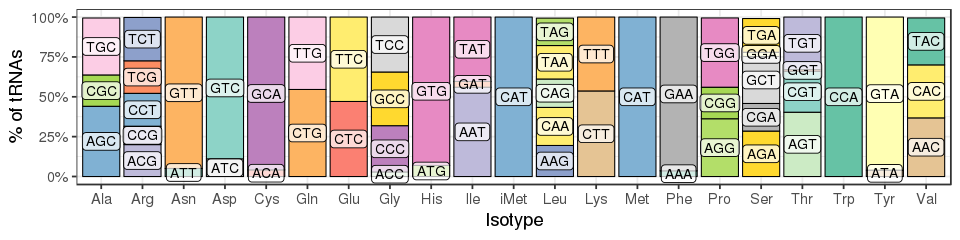

In [38]:
plot = identities %>% 
  filter(!restrict) %>%
  mutate(isotype = factor(isotype, levels = isotypes)) %>%
  group_by(isotype, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), label.padding = unit(0.16, "lines"), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

options(repr.plot.width=8, repr.plot.height=2)
plot
ggsave(filename = 'figS2g-anticodon.pdf', plot = plot, width = 8, height = 2)

In [39]:
plot = identities %>% 
  filter(!restrict) %>%
  group_by(isotype, clade, anticodon) %>%
  summarize(count = n()) %>%
  group_by(isotype, clade) %>%
  mutate(freq = count/sum(count)) %>%
  filter(freq > 0.01) %>%
  ggplot() + geom_bar(aes(x = isotype, y = freq, fill = anticodon), color = 'black', size = 0.3, position = position_stack(reverse = TRUE), stat = 'identity') + 
    geom_label(aes(x = isotype, y = freq, label = anticodon), label.padding = unit(0.16, "lines"), alpha = 0.7, position = position_stack(vjust = 0.5, reverse = FALSE), size = 3) +
    facet_wrap(~ clade, scales = "free") +
    theme(legend.position = "none") + 
    labs(x = 'Isotype', y = '% of tRNAs') +
    scale_fill_manual(values = sample(rep(x = c(brewer.pal(8, "Set2"), brewer.pal(12, "Set3")), 4), replace = FALSE)) + 
    scale_y_continuous(labels = percent)

# options(repr.plot.width=24, repr.plot.height=5)
# plot
ggsave(filename = 'figS8g-clade-anticodon.pdf', plot = plot, width = 24, height = 5)

## Misc. feature exceptions

### Fungi Gly 2:71

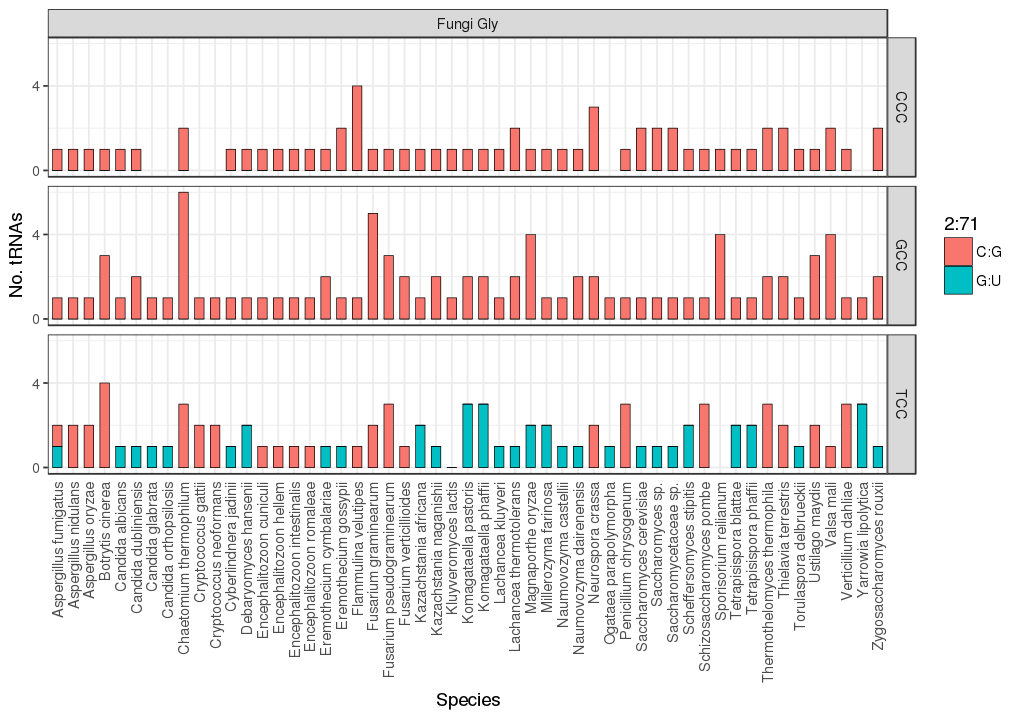

In [40]:
plot = identities %>% filter(!restrict, clade == "Fungi", isotype == "Gly") %>%
  mutate(clade = "Fungi Gly") %>%
  group_by(abbrev) %>% filter(species_long == species_long[1]) %>%
  count(abbrev, clade, X2.71, anticodon) %>% spread(X2.71, n, 0) %>%
  gather(`2:71`, n, -abbrev, -clade, -anticodon, -`G:C`, -`A:U`) %>%
  group_by(abbrev, clade, anticodon, `A:U`, `G:C`, `2:71`) %>%
  summarize(n = mean(n)) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = `2:71`), color = 'black', width = 0.6, size = 0.2, stat = 'identity') +
    facet_grid(anticodon ~ clade) +
    scale_y_continuous(breaks = c(0, 4, 8, 12)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.ticks.x = element_blank()) + 
    guides(fill = guide_legend(title = "2:71")) +
    labs(x = "Species", y = "No. tRNAs")

options(repr.plot.width=8.5, repr.plot.height=6)
plot
ggsave(plot, filename = "figS3a-Gly-2-71.pdf", width = 8, height = 6, dpi = 300)

## Leu/Ser variable arm lengths

In [46]:
plot = identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>%
  rbind(identities %>% filter(!restrict, isotype %in% c("Leu", "Ser")) %>% mutate(clade = "All")) %>%
  select(isotype, clade, D.loop, V.arm) %>%
  filter(D.loop < 12, D.loop > 7, V.arm < 21, V.arm > 7) %>% 
  mutate(clade = relevel(as.factor(clade), "All")) %>%
  ggplot() + geom_density(aes(x = V.arm, fill = clade, color = clade), alpha = 0.7) + 
    facet_wrap(~ paste(clade, isotype), nrow = 7, scales = "free_y") +
    scale_x_continuous(breaks = c(9, 12, 15, 18)) +
    theme(legend.position = "none",
          panel.spacing = unit(0.2, "lines"),
          strip.text.y = element_text(angle = 0)) +
    guides(fill = guide_legend(nrow = 2)) +
    labs(x = "Variable arm length", y = "Density")

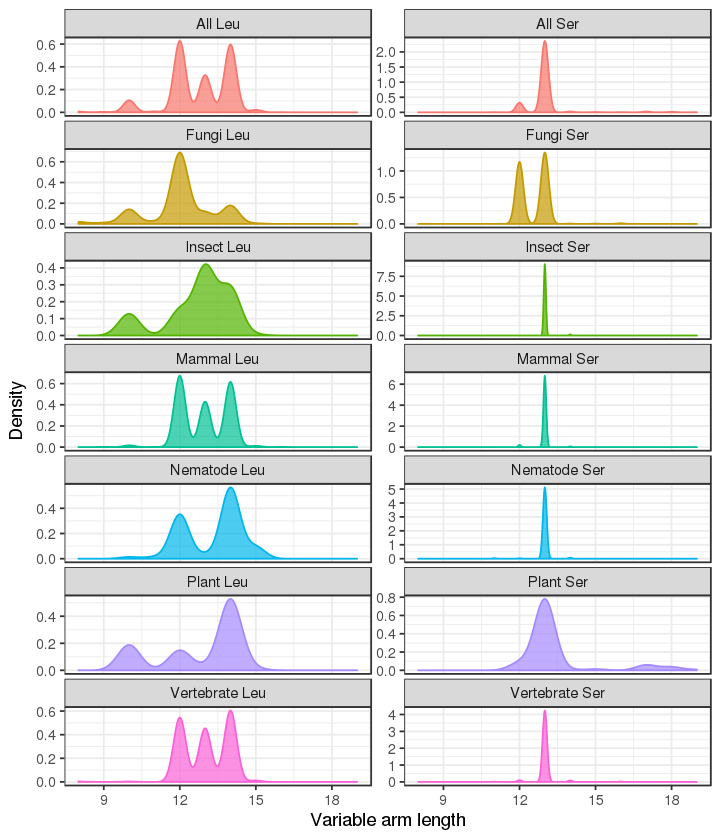

In [47]:
options(repr.plot.width=6, repr.plot.height=7)
plot
ggsave(plot, filename = "figS3b-varm-length.pdf", width = 6, height = 7, dpi = 300)

## Position 21 distribution

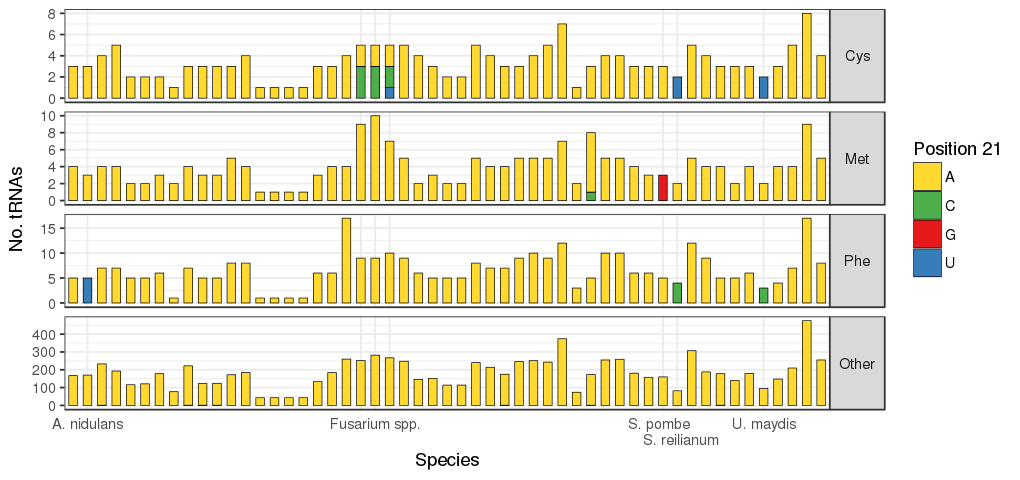

In [48]:
plot = identities %>% filter(clade == "Fungi") %>%
  mutate(isotype = ifelse(isotype %in% c('Cys', 'Met', 'Phe'), isotype, 'Other')) %>%
  group_by(abbrev) %>% filter(species_long == species_long[1]) %>%
  count(species_long, isotype, X21) %>%
  ungroup %>%
  mutate(isotype = factor(isotype, levels = c('Cys', 'Met', 'Phe', 'Other'))) %>%
  ggplot() + geom_bar(aes(x = abbrev, y = n, fill = X21), color = 'black', width = 0.6, size = 0.2, stat = 'identity') +
    scale_x_discrete(breaks = c('Aspergillus nidulans', 'Fusarium graminearum', 'Fusarium pseudograminearum', 'Fusarium verticillioides', 'Schizosaccharomyces pombe', 'Sporisorium reilianum', 'Ustilago maydis'),
                       labels = c('A. nidulans', '', 'Fusarium spp.', '', 'S. pombe  \n         S. reilianum', '', 'U. maydis')) + 
    scale_y_continuous(breaks = pretty_breaks()) +
    scale_fill_manual(values = c('A'='#ffd92f', 'C'='#4daf4a', 'G'='#e41a1c', 'U'='#377eb8')) +
    facet_grid(isotype ~ ., scales = "free") +
    theme(axis.ticks.x = element_blank(),
          strip.text.y = element_text(angle = 0)) +
    guides(fill = guide_legend(title = 'Position 21')) +
    labs(x = "Species", y = "No. tRNAs")

options(repr.plot.width=8.5, repr.plot.height=4)
plot
ggsave(plot, filename = "figS3c-21.pdf", width = 8.5, height = 4, dpi = 300)

## Feature distributions

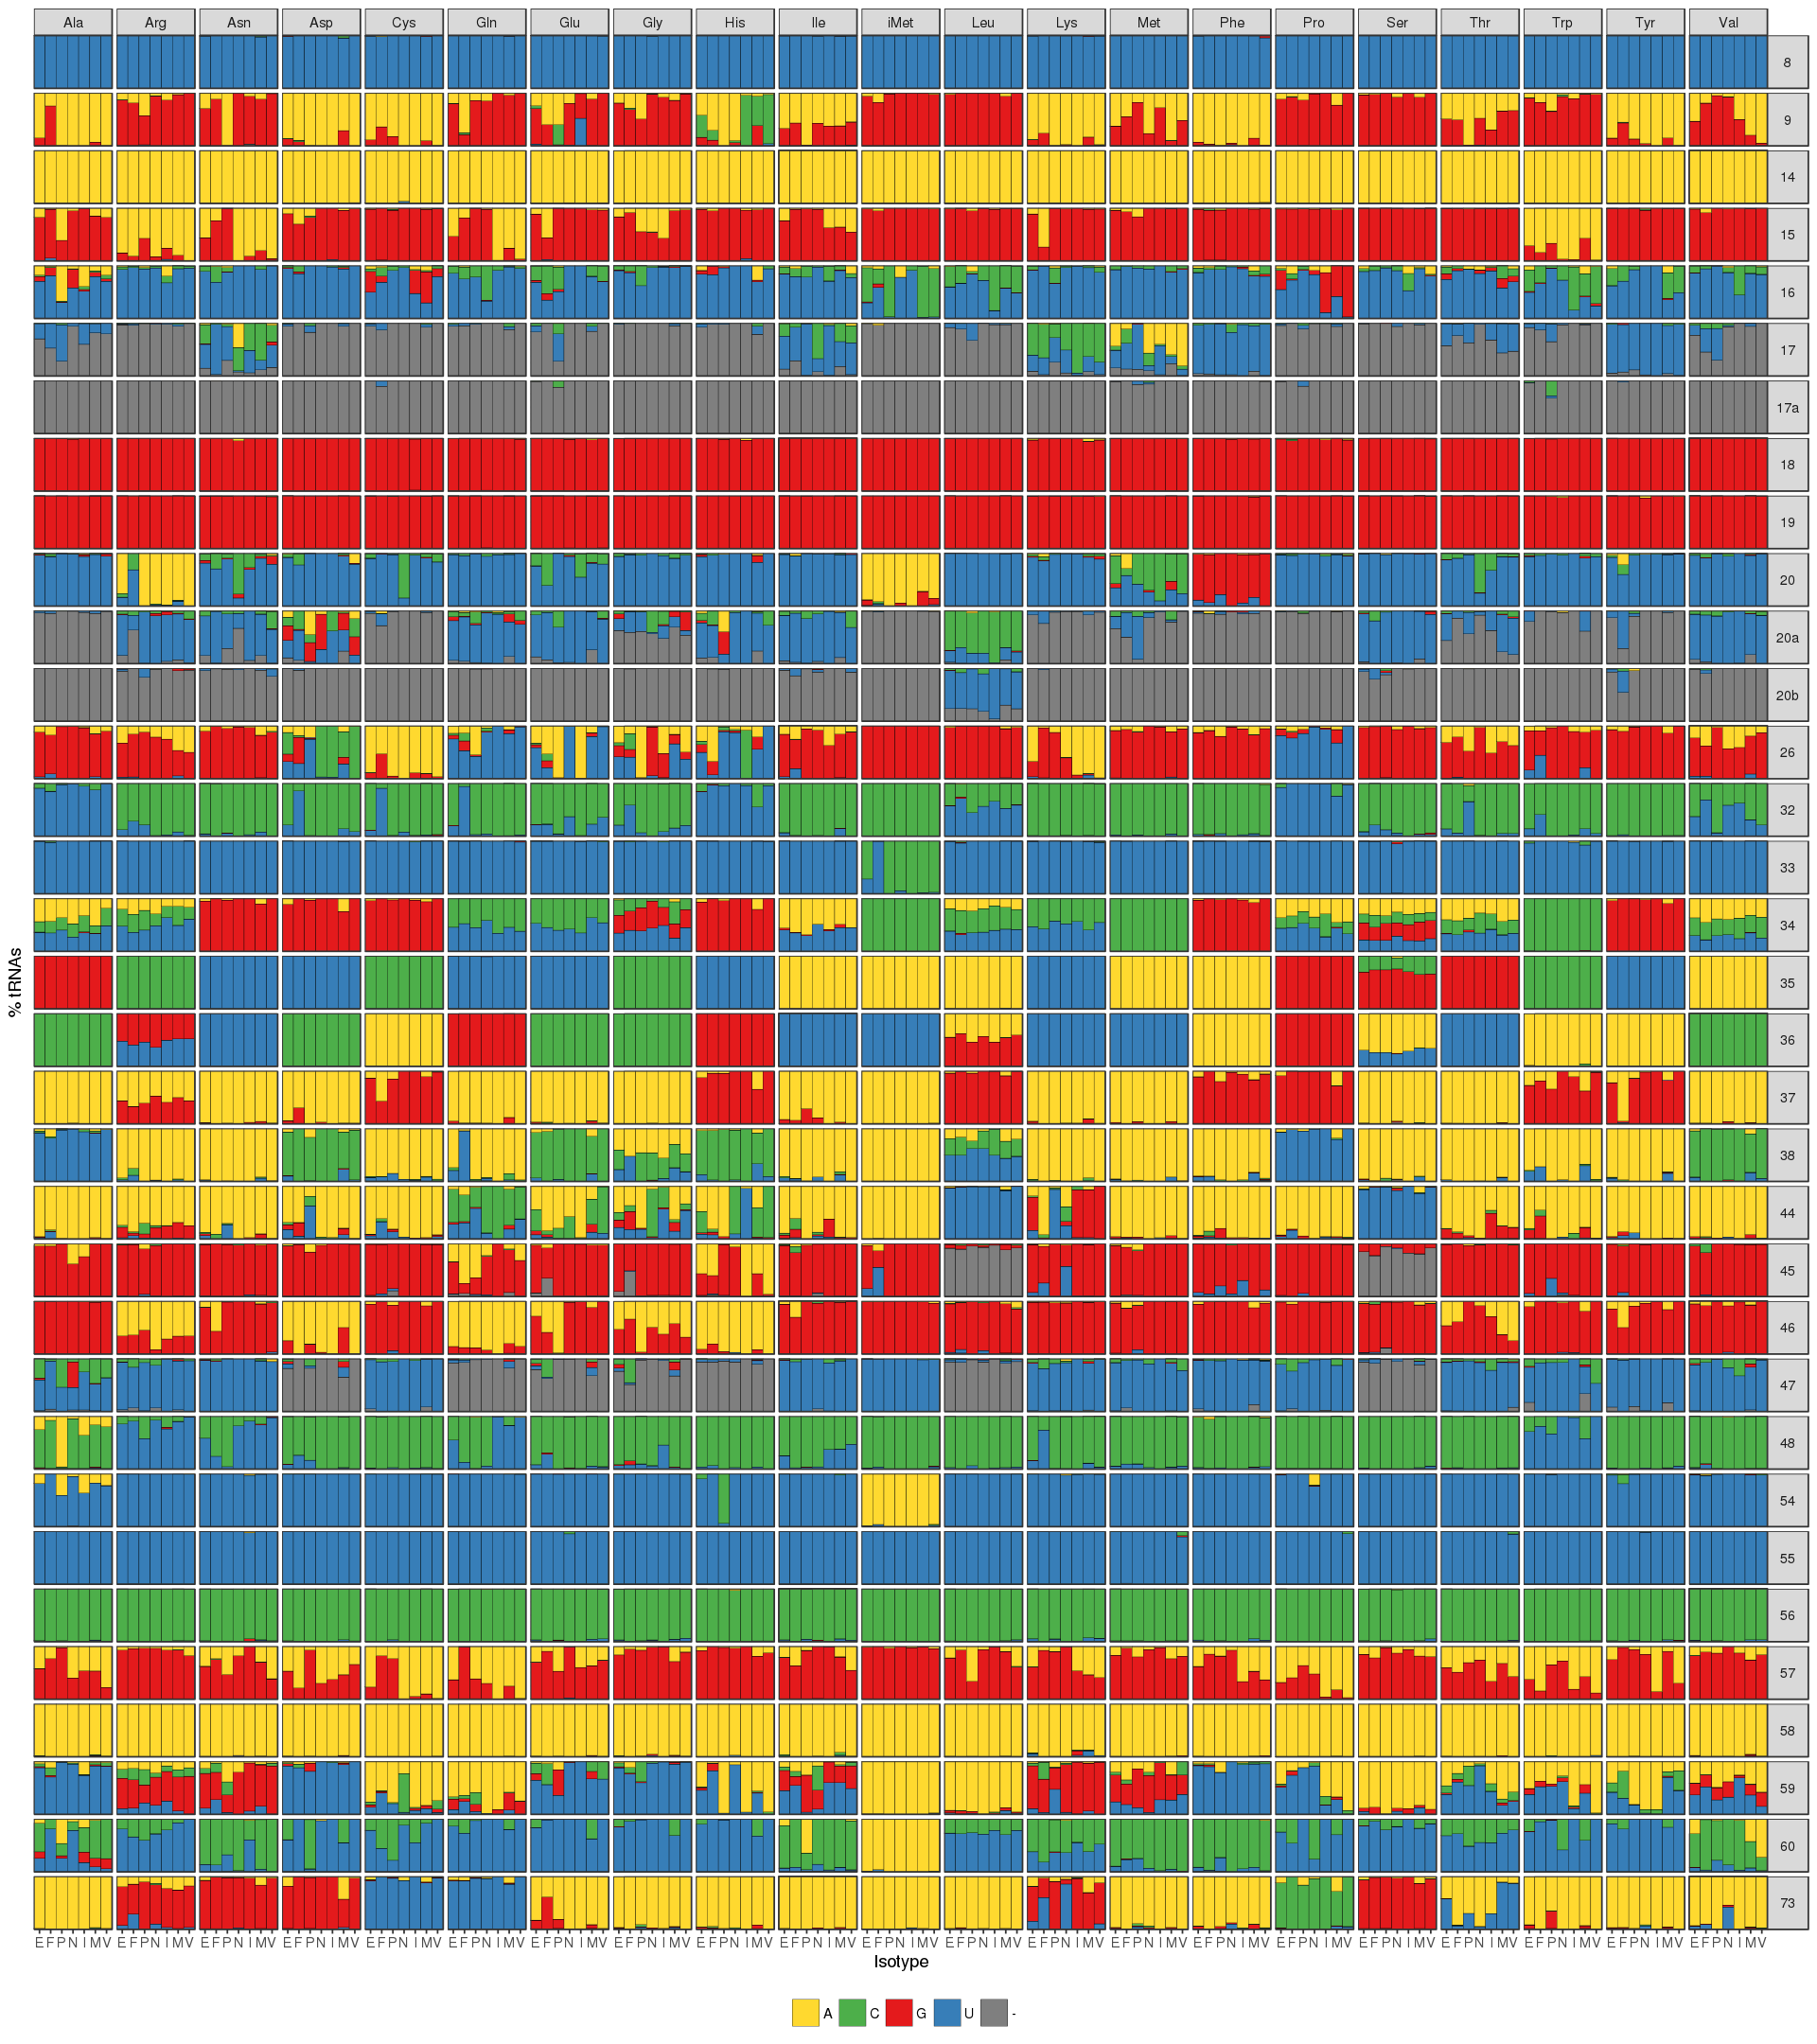

In [49]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X8, X9, X14, X15, X16, X17, X17a, X18, X19, X20, X20a, X20b, X26, X32, X33, X34, X35, X36, X37, X38, X44, X45, X46, X47, X48, X54, X55, X56, X57, X58, X59, X60, X73) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X8, X9, X14, X15, X16, X17, X17a, X18, X19, X20, X20a, X20b, X26, X32, X33, X34, X35, X36, X37, X38, X44, X45, X46, X47, X48, X54, X55, X56, X57, X58, X59, X60, X73) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  filter(identity %in% c("A", "C", "G", "U", "-")) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup() %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>% 
  ungroup() %>%
  mutate(positions = revalue(positions, c('X8' = '8', 'X9' = '9', 'X14' = '14', 'X15' = '15', 'X16' = '16', 'X17' = '17', 'X17a' = '17a', 'X18' = '18', 'X19' = '19', 'X20' = '20', 'X20a' = '20a', 'X20b' = '20b', 'X26' = '26', 'X32' = '32', 'X33' = '33', 'X34' = '34', 'X35' = '35', 'X36' = '36', 'X37' = '37', 'X38' = '38', 'X44' = '44', 'X45' = '45', 'X46' = '46', 'X47' = '47', 'X48' = '48', 'X54' = '54', 'X55' = '55', 'X56' = '56', 'X57' = '57', 'X58' = '58', 'X59' = '59', 'X60' = '60', 'X73' = '73')),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("A", "C", "G", "U", "-"))) %>%
  mutate(positions = factor(positions, levels = c('8', '9', '14', '15', '16', '17', '17a', '18', '19', '20', '20a', '20b', '26', '32', '33', '34', '35', '36', '37', '38', '44', '45', '46', '47', '48', '54', '55', '56', '57', '58', '59', '60', '73')),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes),
         identity = revalue(identity, c('A' = 'A ', 'C' = 'C ', 'G' = 'G ', 'U' = 'U '))) %>%
  ggplot() + geom_bar(aes(x = clade, y = freq, fill = identity), color = 'black', width = 1, size = 0.1, stat = 'identity') +
    facet_grid(positions ~ isotype, scales = "free") +
    scale_fill_manual(values = c('A '='#ffd92f', 'C '='#4daf4a', 'G '='#e41a1c', 'U '='#377eb8', '-'='gray50')) + 
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(labels = percent_format(), breaks = c(0.25, 0.5, 0.75, 1), expand = c(0, 0)) +
    xlab("Isotype") + ylab("% tRNAs") +
    theme(legend.position = 'bottom',
          strip.text.y = element_text(angle = 0),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          panel.spacing = unit(0.2, "lines"),
          legend.title = element_blank())

options(repr.plot.width=16, repr.plot.height=18)
plot
ggsave(plot, filename = "figS5a-base-distributions.pdf", width = 16, height = 18, dpi = 300)

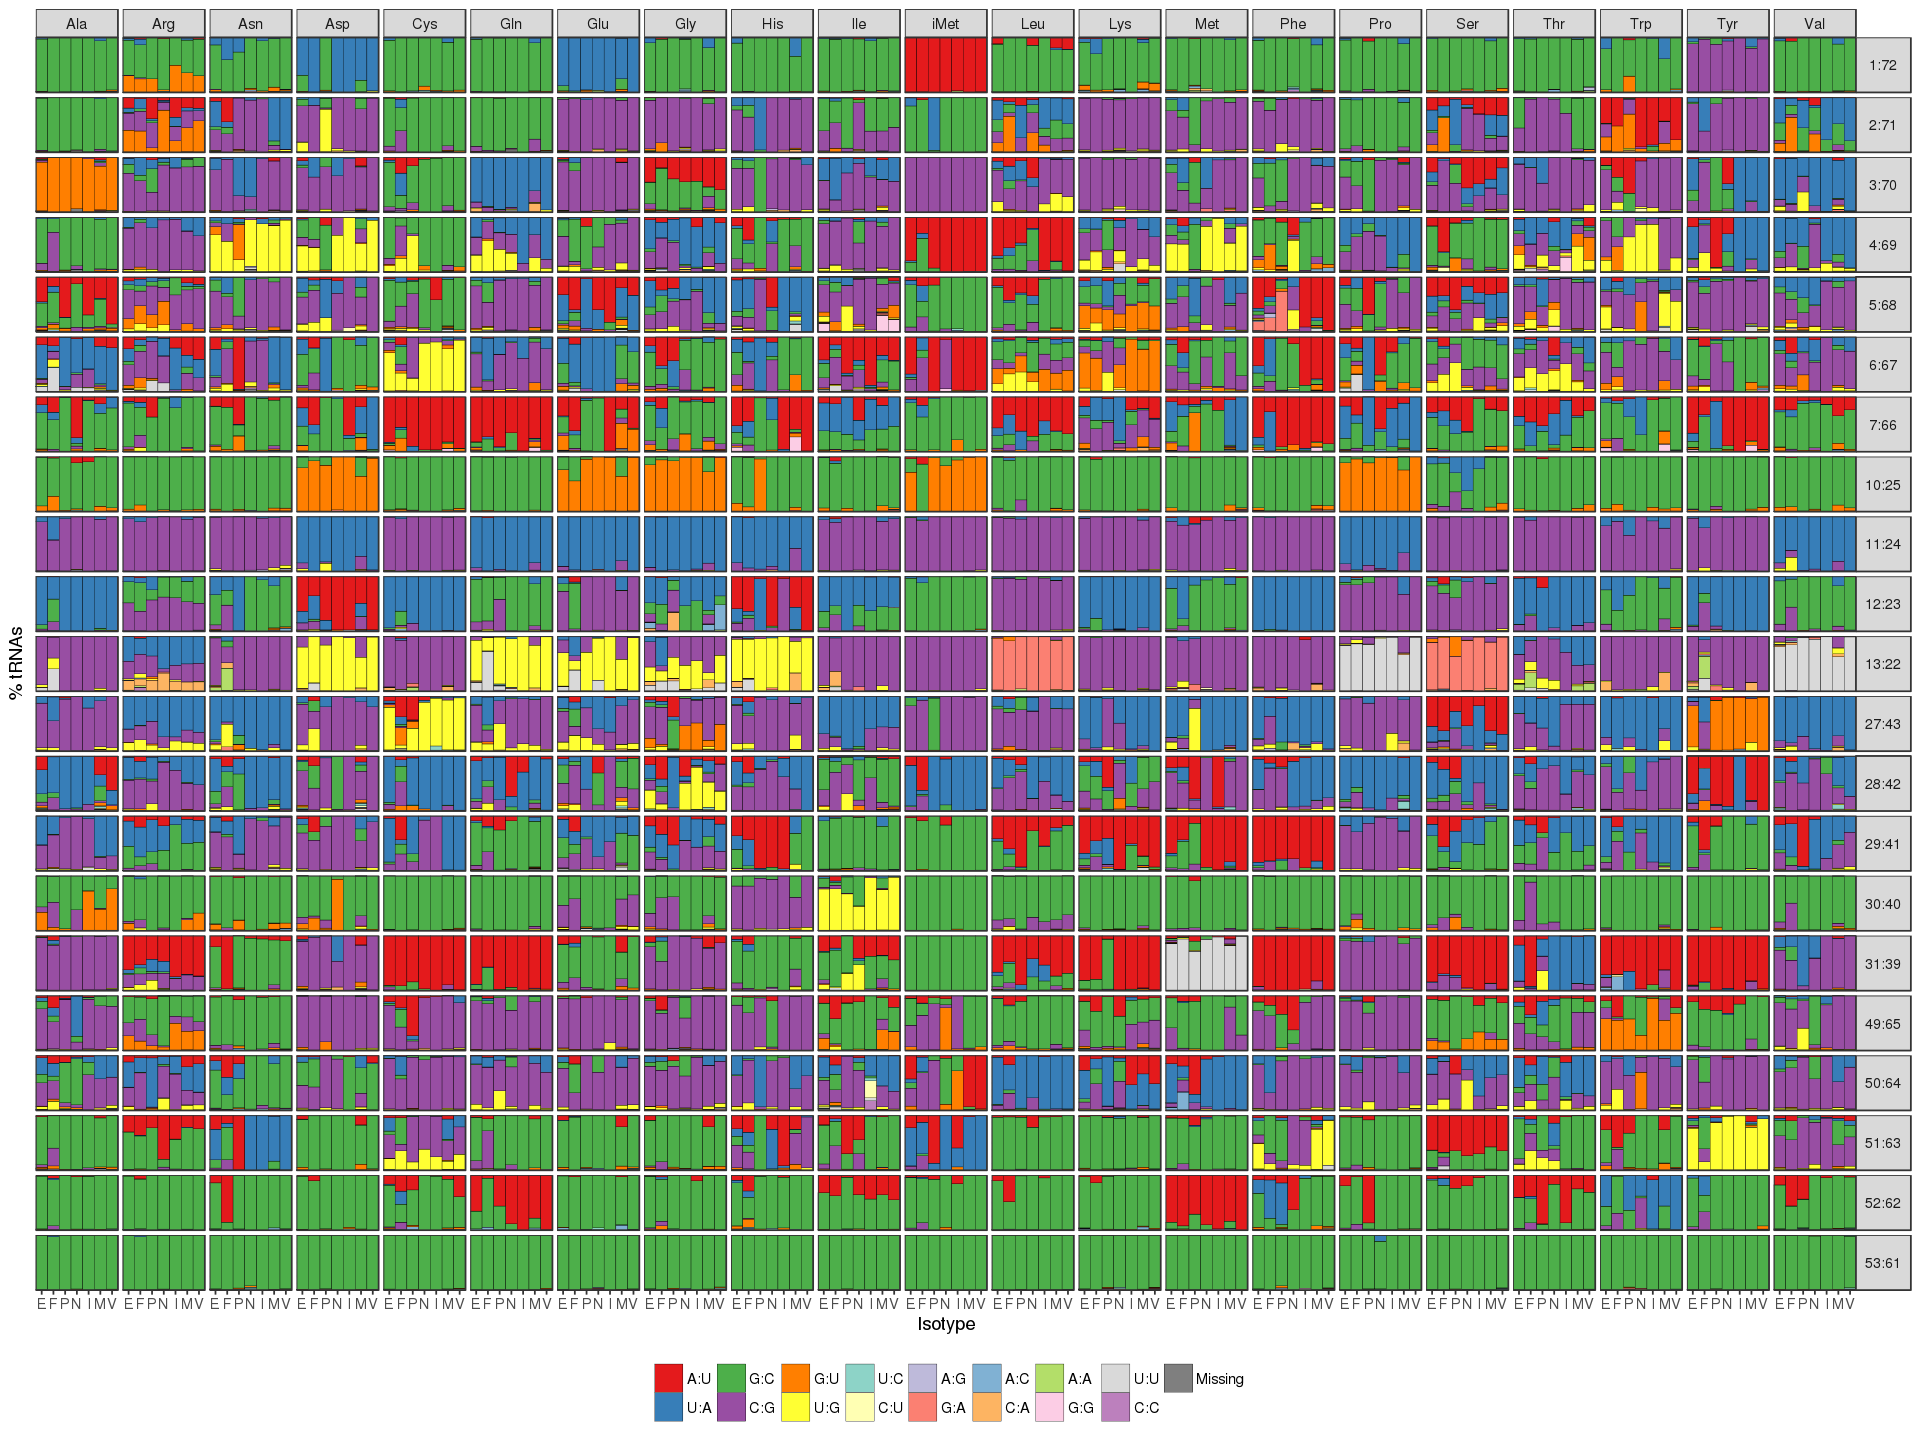

In [50]:
plot = identities %>% filter(!restrict) %>%
  select(isotype, clade, X1.72, X2.71, X3.70, X4.69, X5.68, X6.67, X7.66, X10.25, X11.24, X12.23, X13.22, X27.43, X28.42, X29.41, X30.40, X31.39, X49.65, X50.64, X51.63, X52.62, X53.61) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X1.72, X2.71, X3.70, X4.69, X5.68, X6.67, X7.66, X10.25, X11.24, X12.23, X13.22, X27.43, X28.42, X29.41, X30.40, X31.39, X49.65, X50.64, X51.63, X52.62, X53.61) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  mutate(identity = ifelse(identity %in% c("A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U"), "Missing", identity)) %>%
  filter(identity %in% c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other")) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup() %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>% 
  ungroup() %>%
  mutate(positions = revalue(positions, c('X1.72' = '1:72', 'X2.71' = '2:71', 'X3.70' = '3:70', 'X4.69' = '4:69', 'X5.68' = '5:68', 'X6.67' = '6:67', 'X7.66' = '7:66', 'X10.25' = '10:25', 'X11.24' = '11:24', 'X12.23' = '12:23', 'X13.22' = '13:22', 'X27.43' = '27:43', 'X28.42' = '28:42', 'X29.41' = '29:41', 'X30.40' = '30:40', 'X31.39' = '31:39', 'X49.65' = '49:65', 'X50.64' = '50:64', 'X51.63' = '51:63', 'X52.62' = '52:62', 'X53.61' = '53:61')),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other"))) %>%
  mutate(positions = factor(positions, levels = c('1:72', '2:71', '3:70', '4:69', '5:68', '6:67', '7:66', '10:25', '11:24', '12:23', '13:22', '27:43', '28:42', '29:41', '30:40', '31:39', '49:65', '50:64', '51:63', '52:62', '53:61')),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes),
         identity = revalue(identity, c("A:U" = "A:U ", "U:A" = "U:A ", "G:C" = "G:C ", "C:G" = "C:G ", "G:U" = "G:U ", "U:G" = "U:G ", "U:C" = "U:C ", "C:U" = "C:U ", "A:G" = "A:G ", "G:A" = "G:A ", "A:C" = "A:C ", "C:A" = "C:A ", "A:A" = "A:A ", "G:G" = "G:G ", "U:U" = "U:U ", "C:C" = "C:C "))) %>%
  ggplot() + geom_bar(aes(x = clade, y = freq, fill = identity), color = 'black', width = 1, size = 0.1, stat = 'identity') +
    facet_grid(positions ~ isotype, scales = "free") +
    scale_fill_manual(values = c(brewer.pal(6, "Set1"), brewer.pal(10, "Set3"), "gray50")) + 
    scale_x_discrete(expand = c(0, 0)) +
    scale_y_continuous(labels = percent_format(), breaks = c(0.25, 0.5, 0.75, 1), expand = c(0, 0)) +
    xlab("Isotype") + ylab("% tRNAs") +
    theme(legend.position = 'bottom',
          strip.text.y = element_text(angle = 0),
          axis.ticks.y = element_blank(),
          axis.text.y = element_blank(),
          panel.spacing = unit(0.2, "lines"),
          legend.title = element_blank()) +
    guides(fill = guide_legend(nrow = 2))

options(repr.plot.width=16, repr.plot.height=12)
plot
ggsave(plot, filename = "figS5b-pair-distributions.pdf", width = 16, height = 12, dpi = 300)

In [51]:
tertiary_interactions = identities %>% filter(!restrict) %>%
  select(isotype, clade, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
  rbind(identities %>% filter(!restrict) %>%
    select(isotype, X8.14, X9.23, X10.45, X15.48, X18.55, X19.56, X22.46, X26.44, X54.58) %>%
    mutate(clade = 'All')) %>%
  gather(positions, identity, -isotype, -clade) %>%
  mutate(identity = ifelse(identity %in% c("A:-", "-:A", "C:-", "-:C", "G:-", "-:G", "U:-", "-:U"), "Missing", identity)) %>%
  group_by(isotype, clade, positions) %>%
  mutate(freq = n()) %>% 
  ungroup() %>%
  count(isotype, clade, positions, identity, freq) %>%
  mutate(freq = n/freq) %>% 
  ungroup() %>%
  mutate(identity = ifelse(freq < 0.05, "Other", identity)) %>%
  mutate(positions = revalue(positions, c("X8.14" = "8:14", "X9.23" = "9:23", "X10.45" = "10:45", "X15.48" = "15:48", "X18.55" = "18:55", "X19.56" = "19:56", "X22.46" = "22:46", "X26.44" = "26:44", "X54.58" = "54:58")),
         clade = revalue(clade, c("All" = "E", "Fungi" = "F", "Nematode" = "N", "Plant" = "P", "Insect" = "I", "Mammal" = "M", "Vertebrate" = "V")),
         identity = factor(identity, levels = c("A:U", "U:A", "G:C", "C:G", "G:U", "U:G", "U:C", "C:U", "A:G", "G:A", "A:C", "C:A", "A:A", "G:G", "U:U", "C:C", "Missing", "Other"))) %>%
  mutate(identity = revalue(identity, c("A:U" = "A:U ", "U:A" = "U:A ", "G:C" = "G:C ", "C:G" = "C:G ", "G:U" = "G:U ", "U:G" = "U:G ", "U:C" = "U:C ", "C:U" = "C:U ", "A:G" = "A:G ", "G:A" = "G:A ", "A:C" = "A:C ", "C:A" = "C:A ", "A:A" = "A:A ", "G:G" = "G:G ", "C:C" = "C:C ", "U:U" = "U:U ")),
         clade = factor(clade, levels = c("E", "F", "P", "N", "I", "M", "V")),
         isotype = factor(isotype, levels = isotypes),
         positions = factor(positions, levels = c("8:14", "9:23", "10:45", "15:48", "18:55", "19:56", "22:46", "26:44", "54:58")))

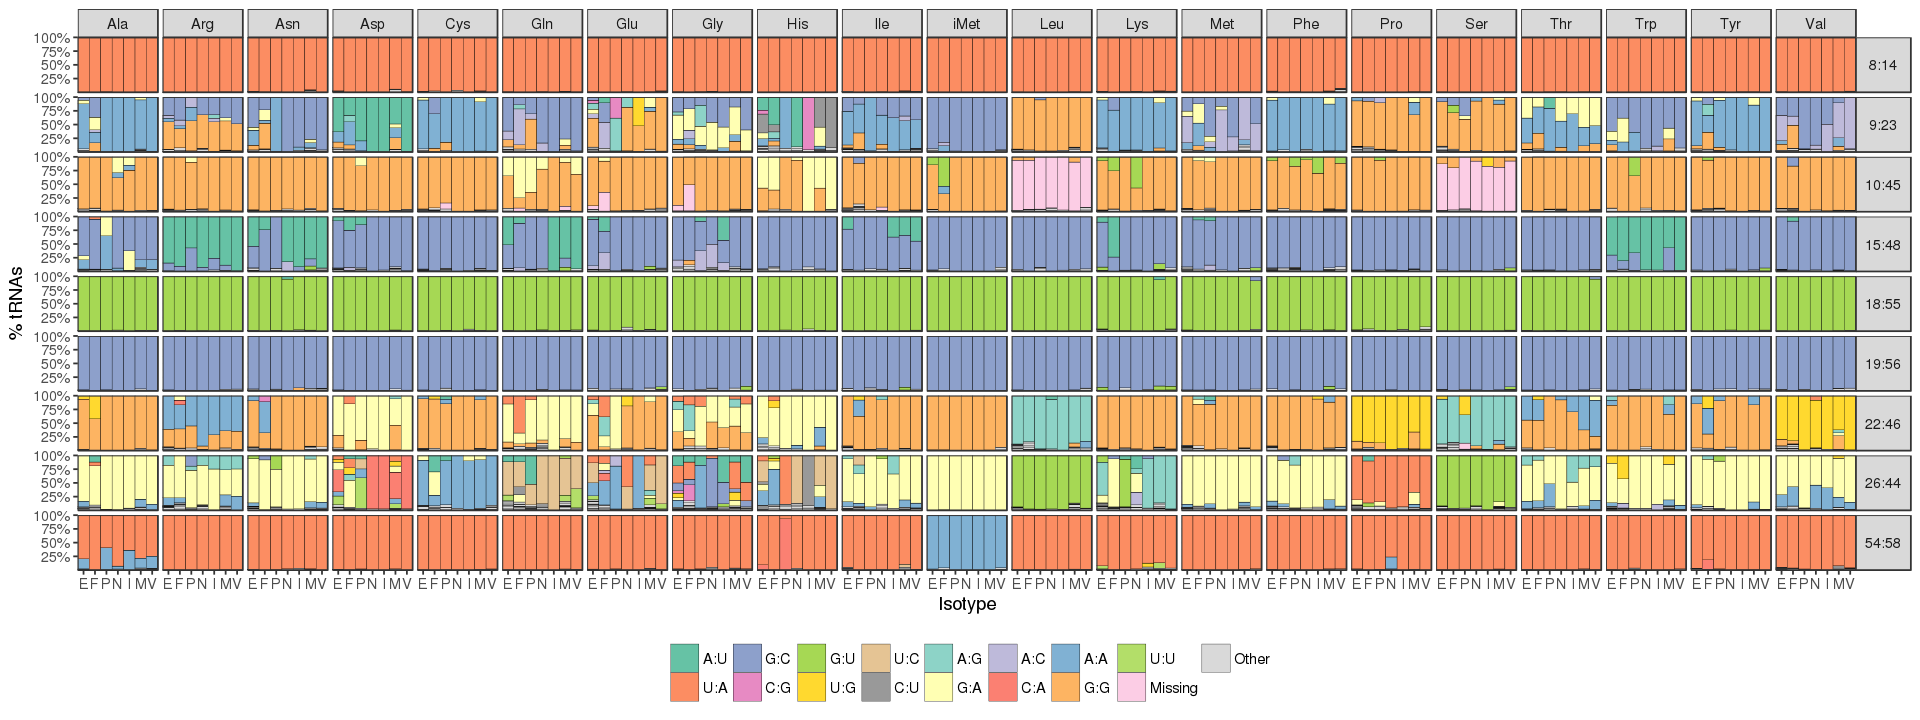

In [52]:
plot = tertiary_interactions %>% ggplot() +
  geom_bar(aes(x = clade, y = freq, fill = identity), color = 'black', width = 1, size = 0.1, stat = 'identity') +
  facet_grid(positions ~ isotype, scales = "free") +
  scale_fill_manual(values = c(brewer.pal(7, "Set2"), "gray60", brewer.pal(12, "Set3"))) + 
  scale_x_discrete(expand = c(0, 0)) +
  scale_y_continuous(labels = percent_format(), breaks = c(0.25, 0.5, 0.75, 1), expand = c(0, 0)) +
  xlab("Isotype") + ylab("% tRNAs") +
  theme(legend.position = 'bottom',
#         axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
        strip.text.y = element_text(angle = 0),
        panel.spacing = unit(0.2, "lines"),
        legend.title = element_blank()) +
  guides(fill = guide_legend(nrow = 2))

options(repr.plot.width=16, repr.plot.height=6)
plot
ggsave(filename = 'figS5c-tertiary-interactions.pdf', plot = plot, width = 16, height = 6)

## Clade-clade comparisons

In [53]:
clade_bits = data.frame()
clades = c('Fungi', 'Insect', 'Nematode', 'Plant', 'Vertebrate', 'Mammal')
for (clade1 in clades) {
  for (clade2 in clades) {
    if (clade1 == clade2) next
    clade_bits = rbind(clade_bits, compare_clade_bits(clade1, clade2) %>% mutate(Model = clade1, Clade = clade2))
  }
}

In [54]:
subfigures = c('a' = 'Fungi', 'b' = 'Nematode', 'c' = 'Insect', 'd' = 'Plant', 'e' = 'Vertebrate', 'f' = 'Mammal')
for (subfigure in c('a', 'b', 'c', 'd', 'e', 'f')) {
  plot = clade_bits %>% filter(Model == subfigures[subfigure]) %>%
    ggplot() + geom_tile(aes(x = Position, y = Isotype, fill = Bits), width = 0.8, height = 0.8) +
    geom_tile(aes(x = Position, y = Isotype), alpha = 0, color = 'gray20', width = 0.8, height = 0.8, size = 0.35) +
    facet_wrap(~ paste0(subfigures[subfigure], ' CM / ', Clade), ncol = 1, scales = 'free') + 
    scale_y_discrete(limits = rev(isotypes), breaks = rev(isotypes)) +
    scale_fill_gradientn(colors = c("mediumpurple4", "firebrick", "white", "steelblue"),
                         values = c(0, 0.5, 0.75, 1),
                         limits = c(-15, 5)) +
    theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5),
          axis.title.y = element_blank(),
          legend.key.height = unit(0.5, "lines"),
          legend.position = "bottom") +
    guides(fill = guide_colorbar(title = "Score", barwidth = 7)) + 
    xlab('Position') + ylab('Isotype') + coord_equal()
  ggsave(plot, filename = paste0('figS9', subfigure, '-', subfigures[subfigure], '.pdf'), width = 7.5, height = 18)
}